In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mlt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
print(os.getcwd())

C:\Users\anupgaurav\Documents\Code\Money


In [4]:
import seaborn as sns

In [5]:
#set directory from your location
os.chdir('C:\\Users\\anupgaurav\\Documents\\Code\\Money')
pd.options.display.max_rows = 999

In [6]:

data=pd.read_csv('loan_data.csv')

In [7]:
data.head()

State  Amount  FICO   DTI  Net Income Home Ownership  Open Trades  \
0    TX    1000   650  0.16        3200           Rent            0   
1    FL     600   691  0.15        3500            Own            0   
2    CA    1500   550  0.44        1700           Rent            0   
3    MA    1500   698  0.30        1500           Rent            0   
4    AZ     875   661  0.57        3400           Rent            3   

   Scheduled Repayment  Loan Repayment  Credit Feature 1  \
0                 1500             712         19.761875   
1                  900             413         18.946381   
2                 2250            1092         18.802652   
3                 2250            1099         19.205639   
4                 1312             637         20.194782   

              ...              accounts[2].reasonCodes[1]  \
0             ...                                     NaN   
1             ...                                     NaN   
2             ...                                     NaN   
3             ...                                     NaN   
4             ...                                     NaN   

   accounts[2].reasonCodes[2]  accounts[2].reasonCodes[3]  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   accounts[1].reasonCodes[4]  accounts[0].reasonCodes[3]  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   accounts[0].reasonCodes[4]  accounts[0].reasonCodes[5]  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   accounts[2].reasonCodes[5]  accounts[2].reasonCodes[4]  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   accounts[1].reasonCodes[5]  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  

[5 rows x 55 columns]

## Question for first part

### Question 1 A

In [8]:
data['days_since_delinquency']=(pd.to_datetime(data['Application Date']) -               pd.to_datetime(data['Last Delinquency Date'])).dt.days.fillna(9999)

In [9]:
data[['Last Delinquency Date','Application Date', 'days_since_delinquency']].head()

Last Delinquency Date      Application Date  days_since_delinquency
0  11/9/2017 12:00:00 AM  2018-03-26T04:00:00Z                   137.0
1                    NaN  2018-03-20T04:00:00Z                  9999.0
2                    NaN  2018-03-23T04:00:00Z                  9999.0
3                    NaN  2018-03-30T04:00:00Z                  9999.0
4                    NaN  2018-03-12T04:00:00Z                  9999.0

In [10]:
data[data['days_since_delinquency']<9999]['days_since_delinquency'].describe()

count    3918.000000
mean      664.863706
std       688.159213
min         9.000000
25%       140.000000
50%       351.500000
75%      1022.750000
max      2989.000000
Name: days_since_delinquency, dtype: float64

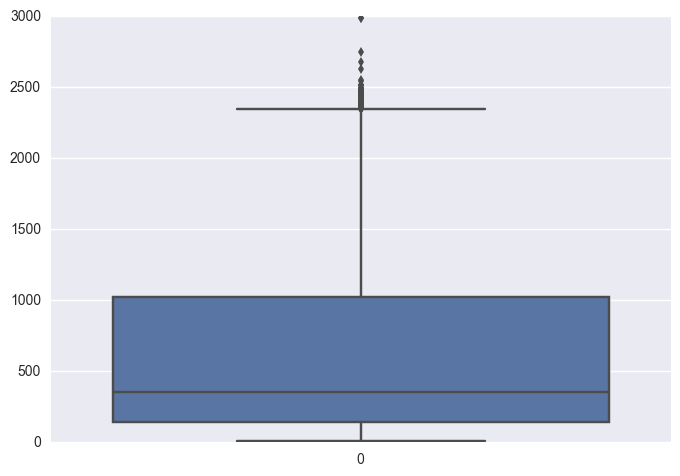

In [11]:
#############boxplot for the char
sns.boxplot(data=data[data['days_since_delinquency']<9999]['days_since_delinquency'])

In [12]:
#count cases for different delinquency
data[data['days_since_delinquency']<9999]['days_since_delinquency'].value_counts().sort_index()

9.0        1
10.0       1
12.0       1
13.0       2
14.0       2
15.0       3
16.0       1
17.0       5
18.0       6
19.0       4
20.0       8
21.0       6
22.0       9
23.0       9
24.0       5
25.0       5
26.0       8
27.0       8
28.0      15
29.0       9
30.0       4
31.0       7
32.0       6
33.0       6
34.0       8
35.0      16
36.0       8
37.0       9
38.0       5
39.0       7
40.0       7
41.0       9
42.0      13
43.0       8
44.0       7
45.0       8
46.0      12
47.0      15
48.0      12
49.0       9
50.0       4
51.0       3
52.0       8
53.0       9
54.0      10
55.0       7
56.0       9
57.0       7
58.0       7
59.0       9
60.0       7
61.0       6
62.0      11
63.0      15
64.0       8
65.0       5
66.0       6
67.0       9
68.0       6
69.0       8
70.0      12
71.0      10
72.0       7
73.0       8
74.0       7
75.0      10
76.0       6
77.0      10
78.0      11
79.0       8
80.0       9
81.0       2
82.0      12
83.0       7
84.0      13
85.0       7
86.0       8

### Some records have the Delinqunecy Date but Amount of Delinquency is 0. Also the box plot shown above tell the outliers in the data.

In [13]:
data_anomoly=pd.DataFrame()
data_anomoly['data']=np.where((data['Last Delinquency Date'].notnull()) & (data['Total Amount Delinquent']<=0),True, False)
data_anomoly['data'].value_counts()

False    8314
True     1686
Name: data, dtype: int64

### Around 17% of records show this anomoly that Total Amount Delinquent <= 0 but still show delinquent date

### Question 1 B

In [14]:
######################columns that are starting with accounts target columns for hot encoding
data_account=data.filter(like='account')

In [15]:
###############hot encoding at account,reason code level
def hot_encoding(data_frame_parsing):
    data_metric=pd.DataFrame()
    for i in data_frame_parsing:
        col_names=data_frame_parsing[i].dropna().unique()
        data_frames=pd.DataFrame(columns=col_names)
        for j in range(len(data_frame_parsing[i])):
            z=str(data_frame_parsing.iloc[j][i])
            if z=='nan':
                continue
            else:
                data_frames.loc[j,z]=1
        temp_unique=[str(s)+str('_') + str(i) for s in col_names]

        data_frames.columns=temp_unique
        if data_metric.empty:
            data_metric=data_frames
        else:
            data_metric=pd.concat(        [data_metric,data_frames],axis=1)
    return data_metric
data_f=hot_encoding(data_account)

In [16]:
data_f

A06_accounts[0].reasonCodes[1] A05_accounts[0].reasonCodes[1]  \
0                                 1                            NaN   
1                               NaN                              1   
2                               NaN                              1   
3                               NaN                            NaN   
4                               NaN                            NaN   
5                                 1                            NaN   
6                               NaN                            NaN   
7                                 1                            NaN   
8                               NaN                            NaN   
9                                 1                            NaN   
10                                1                            NaN   
11                                1                            NaN   
12                              NaN                              1   
13                              NaN                            NaN   
14                              NaN                            NaN   
15                                1                            NaN   
16                              NaN                              1   
17                              NaN                            NaN   
18                                1                            NaN   
19                              NaN                              1   
20                                1                            NaN   
21                                1                            NaN   
22                                1                            NaN   
23                              NaN                            NaN   
24                                1                            NaN   
25                              NaN                            NaN   
26                              NaN                              1   
27                                1                            NaN   
28                              NaN                            NaN   
29                                1                            NaN   
30                              NaN                            NaN   
31                              NaN                            NaN   
32                              NaN                            NaN   
33                                1                            NaN   
34                              NaN                              1   
35                              NaN                            NaN   
36                              NaN                            NaN   
37                              NaN                            NaN   
38                              NaN                              1   
39                              NaN                            NaN   
40                              NaN                            NaN   
41                              NaN                            NaN   
42                                1                            NaN   
43                              NaN                            NaN   
44                                1                            NaN   
45                                1                            NaN   
46                              NaN                            NaN   
47                              NaN                            NaN   
48                                1                            NaN   
49                              NaN                            NaN   
50                              NaN                            NaN   
51                                1                            NaN   
52                                1                            NaN   
53                              NaN                            NaN   
54                              NaN                            NaN   
55                              NaN                            NaN   
56             

In [17]:
##################hot encoding at account level
def hot_encoding_account(data_frame_parsing, account, data_target):
    data_hot_encoding=pd.DataFrame()
    data_hot_encoding=data_frame_parsing.filter(like=('accounts['+str(account)+']'))
    data_metric=pd.DataFrame()
    col_names=set()
    for i in data_hot_encoding:
        col_names=col_names.union(set(list(data_hot_encoding[i].dropna().unique())))
    data_frames=pd.DataFrame(columns=col_names,index=range(10000))
    for i in data_hot_encoding:
        for j in range(len(data_hot_encoding[i])):
            z=str(data_hot_encoding.iloc[j][i])
            if z=='nan':
                continue
            else:
                data_frames.loc[j,z]=1
    temp_unique=[str(s)+str('_') + str(account) for s in col_names]
        
    data_frames.columns=temp_unique
    data_target=pd.concat([data_target,data_frames], axis=1)
    if account<2:
        account=account+1
        data_target=hot_encoding_account(data_frame_parsing, account, data_target)
    return data_target
    
data_hot_encoded_accounts=pd.DataFrame(index=range(10000))
data_fm=hot_encoding_account(data_account, 0, data_hot_encoded_accounts)

In [18]:
data_fm.to_csv('C:\\Users\\anupgaurav\\Documents\\Code\\Money\\hot_encoded_table.csv')

In [19]:
data_fm

A26(*)_0 A22(*)_0 A08_0 A18(*)_0 B38_0 A29(*)_0 A24(*)_0 A25(*)_0  \
0         NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
1         NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
2         NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
3         NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
4         NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
5         NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
6         NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
7         NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
8         NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
9         NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
10        NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
11        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
12        NaN        1   NaN      NaN   NaN      NaN      NaN      NaN   
13        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
14        NaN      NaN     1      NaN   NaN      NaN      NaN      NaN   
15        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
16        NaN      NaN     1      NaN   NaN      NaN      NaN      NaN   
17        NaN      NaN     1      NaN   NaN      NaN      NaN      NaN   
18        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
19        NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
20        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
21        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
22        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
23        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
24        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
25        NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
26        NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
27        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
28        NaN      NaN     1      NaN     1      NaN      NaN      NaN   
29        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
30        NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
31        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
32        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
33        NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
34        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
35        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
36        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
37        NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
38        NaN      NaN     1      NaN   NaN      NaN      NaN      NaN   
39        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
40        NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
41        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
42        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
43        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
44        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
45        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
46        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
47        NaN      NaN   NaN      NaN     1      NaN      NaN      NaN   
48        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
49        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
50        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
51        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
52        NaN      NaN   NaN      NaN   NaN      NaN      NaN      NaN   
53       

In [20]:
###################cross verify some columns you can modify column names in regex as per requirement
data_fm.filter(regex='(^A06|^B10)')

A06_0 B10_1 B10_2
0        1   NaN   NaN
1        1   NaN   NaN
2      NaN   NaN   NaN
3      NaN     1   NaN
4      NaN   NaN   NaN
5        1   NaN   NaN
6        1   NaN   NaN
7        1   NaN   NaN
8      NaN   NaN   NaN
9        1   NaN   NaN
10       1   NaN   NaN
11       1     1   NaN
12     NaN   NaN   NaN
13       1   NaN   NaN
14     NaN   NaN   NaN
15       1   NaN   NaN
16     NaN   NaN   NaN
17     NaN   NaN   NaN
18       1     1   NaN
19     NaN   NaN   NaN
20       1   NaN   NaN
21       1   NaN     1
22       1   NaN   NaN
23     NaN   NaN   NaN
24       1   NaN   NaN
25     NaN   NaN   NaN
26     NaN   NaN   NaN
27       1   NaN   NaN
28     NaN   NaN   NaN
29       1   NaN   NaN
30     NaN   NaN   NaN
31       1   NaN   NaN
32     NaN   NaN   NaN
33       1   NaN   NaN
34       1   NaN   NaN
35     NaN   NaN   NaN
36     NaN   NaN   NaN
37     NaN   NaN   NaN
38     NaN   NaN   NaN
39       1   NaN   NaN
40     NaN   NaN   NaN
41     NaN   NaN   NaN
42       1   NaN   NaN
43     NaN   NaN   NaN
44       1   NaN   NaN
45       1   NaN   NaN
46     NaN   NaN     1
47       1   NaN   NaN
48       1   NaN   NaN
49     NaN   NaN   NaN
50     NaN   NaN   NaN
51       1   NaN   NaN
52       1   NaN   NaN
53     NaN   NaN   NaN
54     NaN   NaN   NaN
55       1   NaN   NaN
56       1   NaN   NaN
57     NaN   NaN   NaN
58     NaN   NaN   NaN
59       1   NaN   NaN
60     NaN   NaN   NaN
61     NaN   NaN   NaN
62       1   NaN   NaN
63       1   NaN   NaN
64       1   NaN   NaN
65       1   NaN   NaN
66     NaN   NaN   NaN
67     NaN   NaN   NaN
68     NaN   NaN   NaN
69       1   NaN   NaN
70     NaN   NaN   NaN
71       1   NaN   NaN
72       1   NaN   NaN
73     NaN   NaN   NaN
74     NaN   NaN   NaN
75       1   NaN   NaN
76       1   NaN   NaN
77       1     1     1
78     NaN   NaN   NaN
79       1   NaN     1
80       1   NaN   NaN
81       1   NaN   NaN
82       1   NaN   NaN
83       1   NaN   NaN
84     NaN   NaN   NaN
85     NaN   NaN   NaN
86     NaN   NaN   NaN
87       1   NaN   NaN
88     NaN   NaN   NaN
89     NaN   NaN   NaN
90     NaN   NaN   NaN
91     NaN   NaN   NaN
92       1   NaN   NaN
93     NaN   NaN   NaN
94     NaN   NaN   NaN
95     NaN   NaN   NaN
96       1   NaN   NaN
97       1   NaN   NaN
98       1   NaN   NaN
99       1   NaN   NaN
100      1   NaN   NaN
101      1     1   NaN
102    NaN   NaN   NaN
103    NaN   NaN   NaN
104      1   NaN   NaN
105    NaN   NaN   NaN
106    NaN   NaN   NaN
107    NaN   NaN   NaN
108    NaN   NaN   NaN
109      1   NaN   NaN
110    NaN   NaN   NaN
111    NaN   NaN   NaN
112    NaN   NaN   NaN
113      1   NaN   NaN
114    NaN   NaN   NaN
115      1   NaN   NaN
116    NaN   NaN   NaN
117    NaN   NaN   NaN
118    NaN   NaN   NaN
119    NaN   NaN   NaN
120      1   NaN   NaN
121      1   NaN   NaN
122    NaN   NaN   NaN
123    NaN   NaN   NaN
124    NaN   NaN   NaN
125    NaN   NaN   NaN
126    NaN   NaN   NaN
127      1   NaN   NaN
128      1   NaN   NaN
129      1   NaN   NaN
130    NaN   NaN   NaN
131      1   NaN   NaN
132    NaN   NaN   NaN
133    NaN   NaN   NaN
134      1   NaN   NaN
135    NaN   NaN   NaN
136      1   NaN   NaN
137      1   NaN   NaN
138      1   NaN   NaN
139    NaN   NaN   NaN
140      1   NaN   NaN
141    NaN   NaN   NaN
142    NaN   NaN   NaN
143      1     1   NaN
144    NaN   NaN   NaN
145    NaN   NaN   NaN
146    NaN   NaN   NaN
147      1   NaN   NaN
148    NaN   NaN   NaN
149    NaN   NaN   NaN
150    NaN   NaN   NaN
151      1   NaN   NaN
152      1   NaN   NaN
153      1   NaN   NaN
154      1   NaN   NaN
155    NaN   NaN   NaN
156    NaN   NaN   NaN
157      1   NaN   NaN
158      1     1   NaN
159    NaN   NaN   NaN
160    NaN   NaN   NaN
161    NaN   NaN   NaN
162    NaN   NaN   NaN
163    NaN   NaN   NaN
164    NaN   NaN   NaN
165    NaN   NaN   NaN
166      1   NaN   NaN
167    NaN   NaN   NaN
168      1   NaN   NaN
169      1   NaN   NaN
170    NaN   NaN   NaN
171      1   NaN   NaN
172    NaN   NaN   NaN
173

In [21]:
##############function to count max values/codes for every account at reason code level
def top_codes(data, data_target_top):
    data=data.fillna('missing') ################manage missing values if we skip this step values with non missing would be counted
    for i in data:        
        z=data.groupby(i).size().sort_values(ascending=False).reset_index().loc[:2, i]
        data_target_top=pd.concat([data_target_top,z],axis=1)
    return data_target_top
col_names_top=data_account.columns
data_target_top=pd.DataFrame()
data_top_out=top_codes(data_account, data_target_top)
data_top_out

accounts[0].reasonCodes[1] accounts[1].reasonCodes[1]  \
0                        A06                    missing   
1                    missing                        B06   
2                        A05                        B05   

  accounts[2].reasonCodes[0] accounts[1].reasonCodes[0]  \
0                    missing                    missing   
1                        B05                     B01(#)   
2                     B01(#)                     B04(#)   

  accounts[0].reasonCodes[0] accounts[1].reasonCodes[3]  \
0                     A01(#)                    missing   
1                     A04(#)                     B16(*)   
2                        A06                     B22(*)   

  accounts[1].reasonCodes[2] accounts[0].reasonCodes[2]  \
0                    missing                    missing   
1                     B16(*)                        B38   
2                        B05                        A06   

  accounts[2].reasonCodes[1] accounts[2].reasonCodes[2]  \
0                    missing                    missing   
1                     B14(*)                     B16(*)   
2                        B07                     B14(*)   

  accounts[2].reasonCodes[3] accounts[1].reasonCodes[4]  \
0                    missing                    missing   
1                     B16(*)                     B22(*)   
2                     B22(*)                     B21(*)   

  accounts[0].reasonCodes[3] accounts[0].reasonCodes[4]  \
0                    missing                    missing   
1                        B38                     A16(*)   
2                        A09                        B38   

  accounts[0].reasonCodes[5] accounts[2].reasonCodes[5]  \
0                    missing                    missing   
1                     A37(*)                     B37(*)   
2                     A21(*)                     B28(*)   

  accounts[2].reasonCodes[4] accounts[1].reasonCodes[5]  
0                    missing                    missing  
1                     B22(*)                     B17(*)  
2                     B23(*)                     B33(*)

## Data Exploration

### new variables for loan

### loan_repayment_flag_by_amount: where Amount > Loan Repayment  (If data is for accounts which are closed then it shows that this users did not even pay base loan)

### loan_repayment_percentage: Loan repaid out of Scheduled Repayment

In [22]:
data['loan_repayment_flag_by_amount']=np.where(data['Amount']<data['Loan Repayment'], True,    False)

In [23]:
data['loan_repayment_flag_by_amount'].value_counts()

False    5680
True     4320
Name: loan_repayment_flag_by_amount, dtype: int64

In [24]:
data['loan_repayment_flag_by_scheduled_repayment']=np.where(data['Scheduled Repayment']>data['Loan Repayment'],   False, True)

In [25]:
data['loan_repayment_flag_by_scheduled_repayment'].value_counts()
######no accounts who paid more than Scheduled Repayment

False    10000
Name: loan_repayment_flag_by_scheduled_repayment, dtype: int64

In [26]:
data['loan_repayment_percentage']=data['Loan Repayment']/data['Scheduled Repayment']

In [27]:
data['loan_repayment_percentage']=data['loan_repayment_percentage'].round(2)

In [28]:
data.head()

State  Amount  FICO   DTI  Net Income Home Ownership  Open Trades  \
0    TX    1000   650  0.16        3200           Rent            0   
1    FL     600   691  0.15        3500            Own            0   
2    CA    1500   550  0.44        1700           Rent            0   
3    MA    1500   698  0.30        1500           Rent            0   
4    AZ     875   661  0.57        3400           Rent            3   

   Scheduled Repayment  Loan Repayment  Credit Feature 1  \
0                 1500             712         19.761875   
1                  900             413         18.946381   
2                 2250            1092         18.802652   
3                 2250            1099         19.205639   
4                 1312             637         20.194782   

             ...              accounts[0].reasonCodes[3]  \
0            ...                                     NaN   
1            ...                                     NaN   
2            ...                                     NaN   
3            ...                                     NaN   
4            ...                                     NaN   

   accounts[0].reasonCodes[4]  accounts[0].reasonCodes[5]  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   accounts[2].reasonCodes[5]  accounts[2].reasonCodes[4]  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   accounts[1].reasonCodes[5]  days_since_delinquency  \
0                         NaN                   137.0   
1                         NaN                  9999.0   
2                         NaN                  9999.0   
3                         NaN                  9999.0   
4                         NaN                  9999.0   

   loan_repayment_flag_by_amount  loan_repayment_flag_by_scheduled_repayment  \
0                          False                                       False   
1                          False                                       False   
2                          False                                       False   
3                          False                                       False   
4                          False                                       False   

   loan_repayment_percentage  
0                       0.47  
1                       0.46  
2                       0.49  
3                       0.49  
4                       0.49  

[5 rows x 59 columns]

C:\Users\anupgaurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


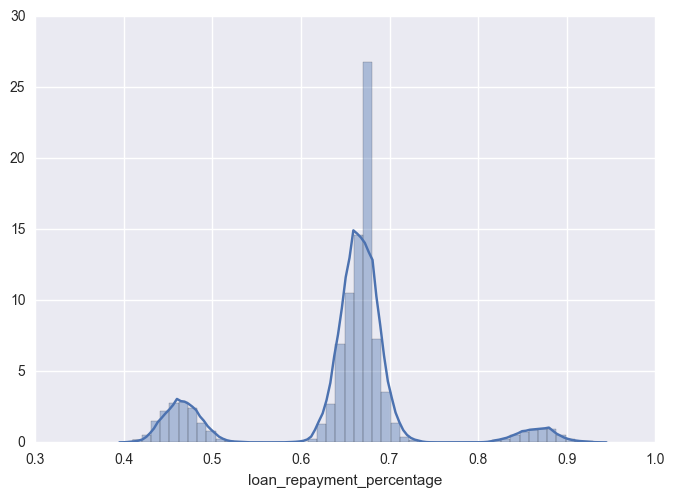

In [29]:
sns.distplot(data['loan_repayment_percentage'])

In [30]:
data['loan_repayment_percentage'].value_counts().sort_index()

0.41       5
0.42      15
0.43      56
0.44     159
0.45     230
0.46     288
0.47     294
0.48     248
0.49     140
0.50      82
0.51      27
0.52       7
0.53       4
0.59       2
0.60       6
0.61      23
0.62     132
0.63     284
0.64     720
0.65    1093
0.66    1519
0.67    1465
0.68    1316
0.69     758
0.70     370
0.71     138
0.72      40
0.73      16
0.74       1
0.81       2
0.82      14
0.83      27
0.84      52
0.85      75
0.86      93
0.87      97
0.88     101
0.89      57
0.90      25
0.91      11
0.92       7
0.93       1
Name: loan_repayment_percentage, dtype: int64

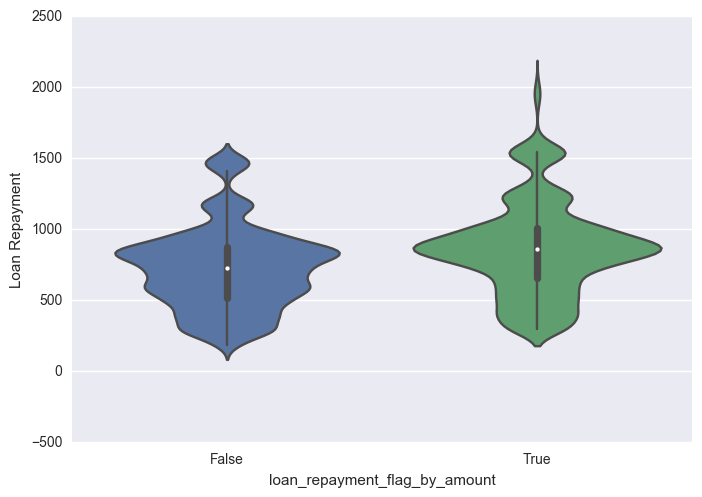

In [31]:
sns.violinplot(x=data['loan_repayment_flag_by_amount'], y=data['Loan Repayment'])

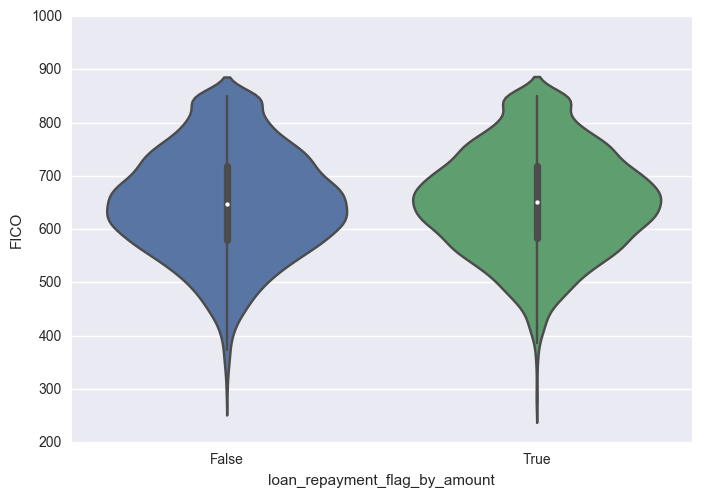

In [32]:
sns.violinplot(x=data['loan_repayment_flag_by_amount'], y=data['FICO'])

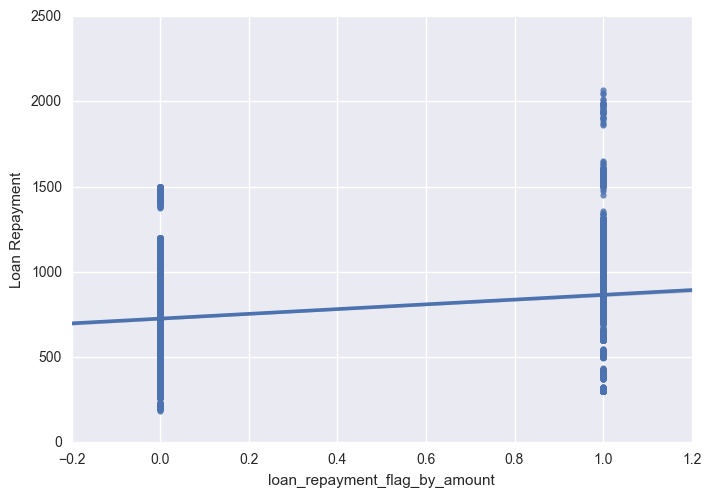

In [33]:
sns.regplot(x=data['loan_repayment_flag_by_amount'], y=data['Loan Repayment'])

### FICO brackets as per score

### Exploring FICO and Delinquency details for different users

In [34]:
data.loc[data['FICO']>=750, 'FICO_bracket']=1
data.loc[(data['FICO']>=700) & (data['FICO']<750), 'FICO_bracket']=2
data.loc[(data['FICO']>=650) & (data['FICO']<700), 'FICO_bracket']=3
data.loc[(data['FICO']>=550) & (data['FICO']<650), 'FICO_bracket']=4
data.loc[data['FICO']<550, 'FICO_bracket']=5
data_frame_plot=data.groupby(['FICO_bracket']).size().reset_index()
data_frame_plot.columns=['FICO_bracket', 'Count']
data_frame_plot['Percentage'] = 100 * data_frame_plot['Count']  / data_frame_plot['Count'].sum()
data_frame_plot

FICO_bracket  Count  Percentage
0           1.0   1686       16.86
1           2.0   1418       14.18
2           3.0   1879       18.79
3           4.0   3453       34.53
4           5.0   1564       15.64

In [35]:
##########mean Loan Repayment as per the FICO brackets should be high for high score
data.groupby('FICO_bracket')['Loan Repayment'].mean()

FICO_bracket
1.0    789.502966
2.0    783.275740
3.0    785.501330
4.0    785.635679
5.0    785.698210
Name: Loan Repayment, dtype: float64

### Delinquency flag as years from delinquency

### Usually users with recent Delinquency record should be considered risky and should be declined or charged higher fees

In [36]:
data['delinquency_yr']=np.where(data['days_since_delinquency']<=365,1,0)
data['delinquency_yr_2']=np.where(data['days_since_delinquency']<=730,1,0)
data['delinquency_yr_5']=np.where(data['days_since_delinquency']<=1825,1,0)

In [37]:
####################user recently with delinquency have lower repayment average
data.groupby('delinquency_yr')['Loan Repayment'].mean()

delinquency_yr
0    787.309327
1    780.457542
Name: Loan Repayment, dtype: float64

In [38]:
#########################as the period from Delinquency increases the mean repayment increases means better population
data.groupby('delinquency_yr_2')['Loan Repayment'].mean()

delinquency_yr_2
0    787.639767
1    781.160259
Name: Loan Repayment, dtype: float64

In [39]:
data.groupby('delinquency_yr_5')['Loan Repayment'].mean()

delinquency_yr_5
0    787.832741
1    782.456454
Name: Loan Repayment, dtype: float64

### The mean loan repayment amount is gradually decreasing with Delinquency Date

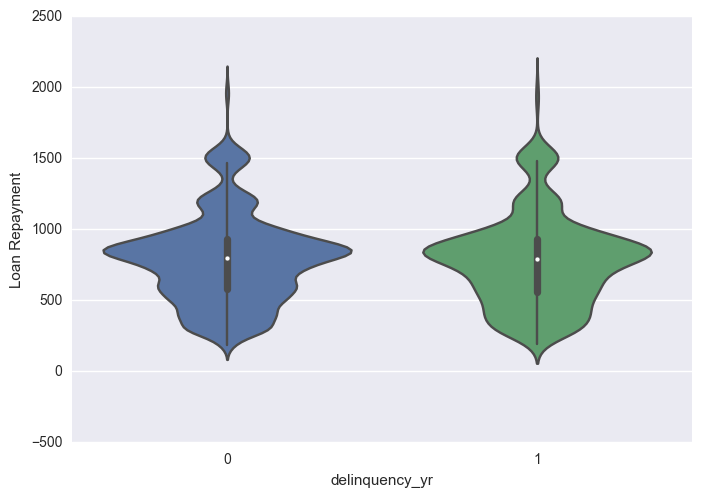

In [40]:
sns.violinplot(x=data['delinquency_yr'], y=data['Loan Repayment'])

### Exploring State level details

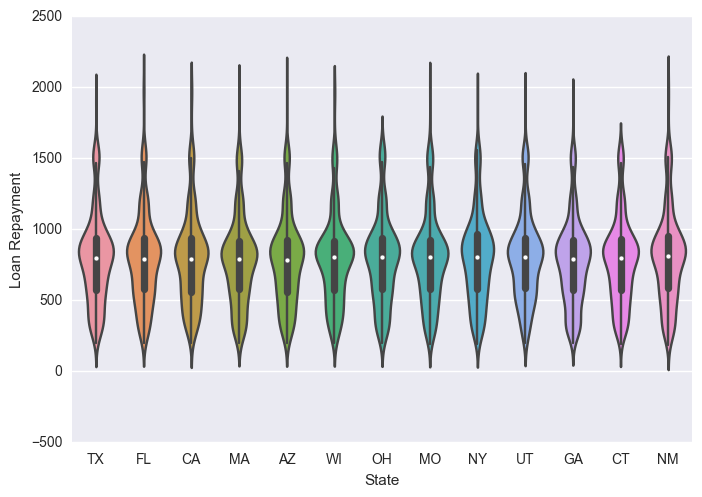

In [41]:
sns.violinplot(x=data['State'], y=data['Loan Repayment'])

Overall the states OH and CT have less spread in Loan Repayment variable

In [42]:
data_state=data.groupby('State')
continuous_columns=['Loan Repayment', 'Amount', 'Scheduled Repayment', 'FICO']
data_mean_stats=pd.DataFrame()
for i in continuous_columns:
    data_mean=data_state[i].mean().reset_index()
    data_mean .columns=['State',str(i)+'_mean']
    data_mean_stats=pd.concat([data_mean_stats, data_mean], axis=1)
data_mean_stats

State  Loan Repayment_mean State  Amount_mean State  \
0     AZ           775.207827    AZ   803.171390    AZ   
1     CA           786.508816    CA   803.557935    CA   
2     CT           778.590851    CT   804.923761    CT   
3     FL           788.702539    FL   815.931076    FL   
4     GA           769.974260    GA   791.473616    GA   
5     MA           777.918954    MA   814.019608    MA   
6     MO           787.051572    MO   809.182390    MO   
7     NM           804.825911    NM   821.255061    NM   
8     NY           792.513761    NY   817.595020    NY   
9     OH           785.032698    OH   810.524523    OH   
10    TX           790.905542    TX   813.476071    TX   
11    UT           795.897365    UT   822.364771    UT   
12    WI           784.846255    WI   807.982917    WI   

    Scheduled Repayment_mean State   FICO_mean  
0                1204.688259    AZ  642.740891  
1                1205.270781    CA  646.989924  
2                1207.317662    CT  645.791614  
3                1223.834341    FL  647.199516  
4                1187.154440    GA  648.217503  
5                1220.963399    MA  649.071895  
6                1213.708176    MO  646.137107  
7                1231.821862    NM  657.411606  
8                1226.327654    NY  652.686763  
9                1215.723433    OH  658.581744  
10               1220.143577    TX  653.046599  
11               1233.488211    UT  647.416089  
12               1211.898817    WI  650.291721

### New Mexico has better average for all above metrics while Arizona is least. Same trend is followed for FICO score and also Loan Repayment

### Though GA has higher FICO mean the mean Amount of loan for this state is low. This shows borrowers might need low amount loans as it is not a expensive place or users from this state are not qualified for high loan amount

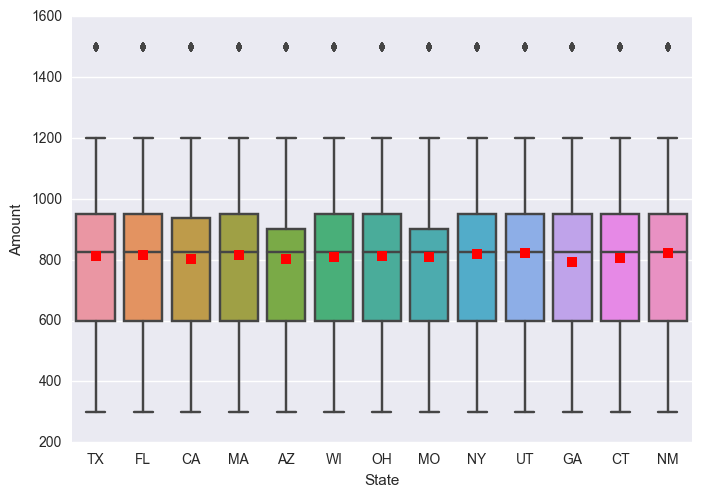

In [43]:
sns.boxplot(x="State", y="Amount", data=data, showmeans=True)

### Amount is left skewed for all states. But Q75 is low for AZ and MO which shows majority of Loan amounts are low for these states

### Also every state has similar outlier. These might be due to high FICO score need to analyze this.

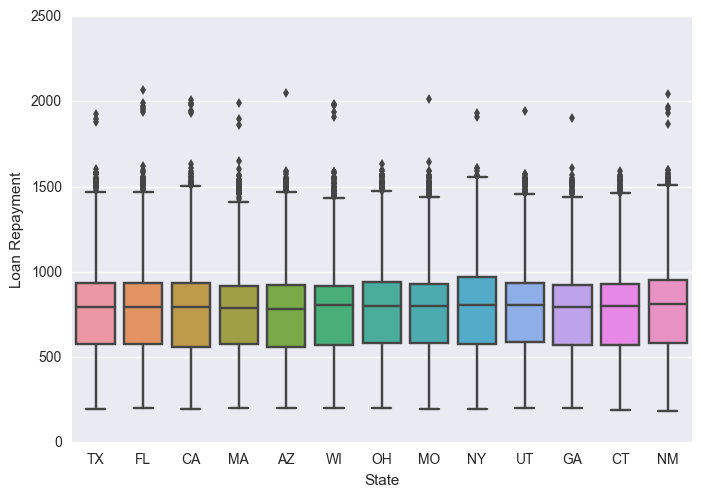

In [44]:
sns.boxplot(x="State", y="Loan Repayment", data=data)

## Calculating the loan percentage or fees for every record

### loan_percentage= (Scheduled Repayment - Amount)/ Amount *100

### salary_percentage=Amount/Net Income

In [45]:
data['loan_percentage']=(data['Scheduled Repayment']-data['Amount'])/data['Amount']*100
data['loan_percentage']=data['loan_percentage'].round(2)
data['salary_percentage']=data['Amount']/data['Net Income']
data['loan_repayment_salary']=                              data['Loan Repayment']/data['Net Income']

In [46]:
data['loan_percentage'].value_counts()

50.00    8697
49.94    1303
Name: loan_percentage, dtype: int64

### Scheduled Repayment is almost 150% of Amount

In [47]:
#################check the columns with null values
data.columns[data.isnull().any()].tolist()
#################only columns with account level information that we hot encoded have missing values

['Last Delinquency Date',
 'accounts[0].reasonCodes[1]',
 'accounts[1].reasonCodes[1]',
 'accounts[2].reasonCodes[0]',
 'accounts[1].reasonCodes[0]',
 'accounts[0].reasonCodes[0]',
 'accounts[1].reasonCodes[3]',
 'accounts[1].reasonCodes[2]',
 'accounts[0].reasonCodes[2]',
 'accounts[2].reasonCodes[1]',
 'accounts[2].reasonCodes[2]',
 'accounts[2].reasonCodes[3]',
 'accounts[1].reasonCodes[4]',
 'accounts[0].reasonCodes[3]',
 'accounts[0].reasonCodes[4]',
 'accounts[0].reasonCodes[5]',
 'accounts[2].reasonCodes[5]',
 'accounts[2].reasonCodes[4]',
 'accounts[1].reasonCodes[5]']

### Analyze columns with Credit information

### I am exporting charts to files please choose address accordingly while running

C:\Users\anupgaurav\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


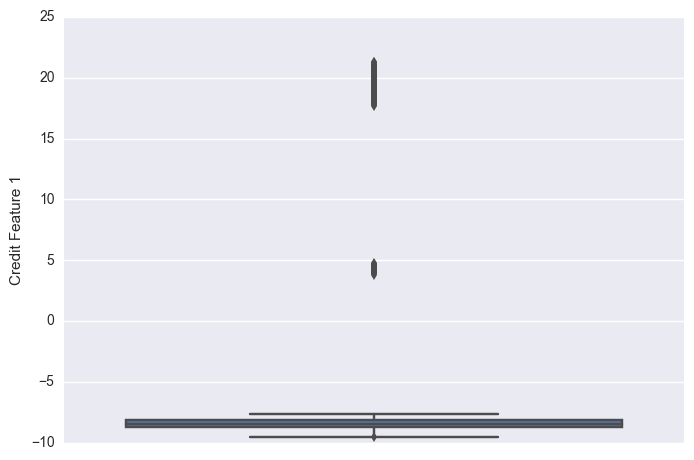

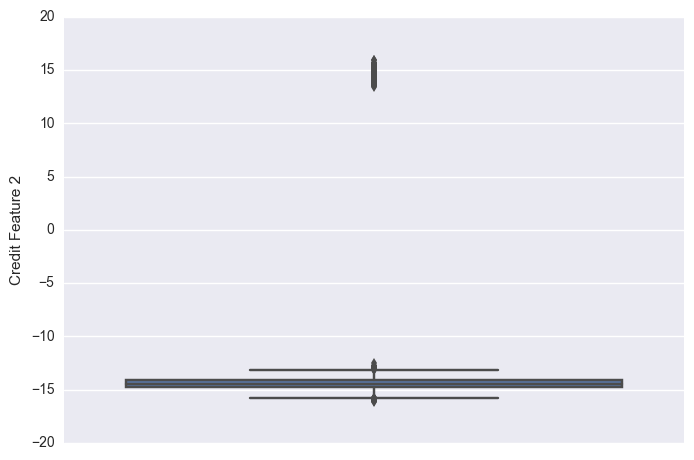

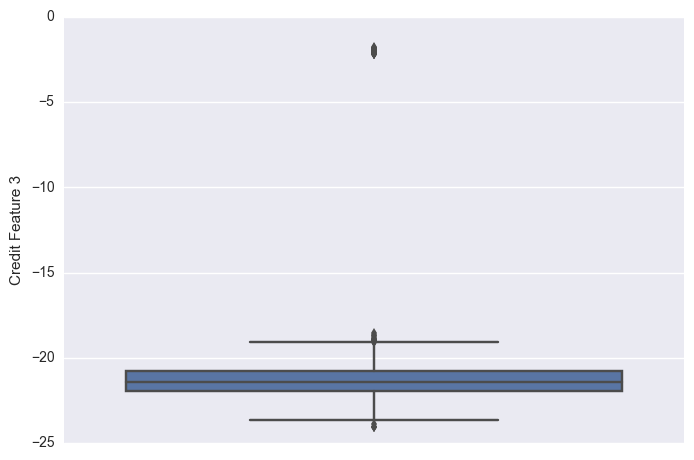

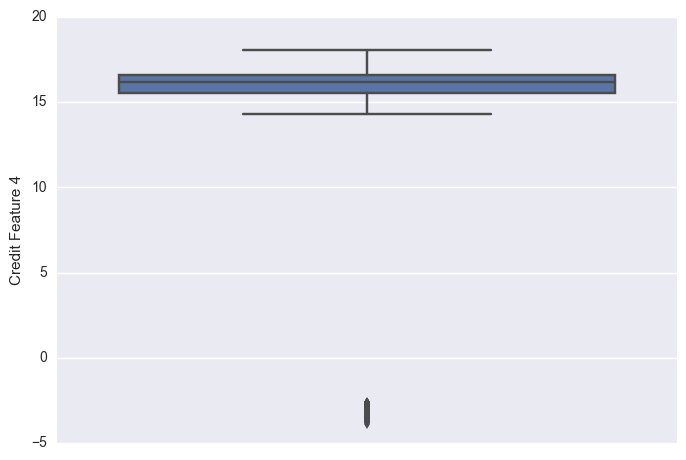

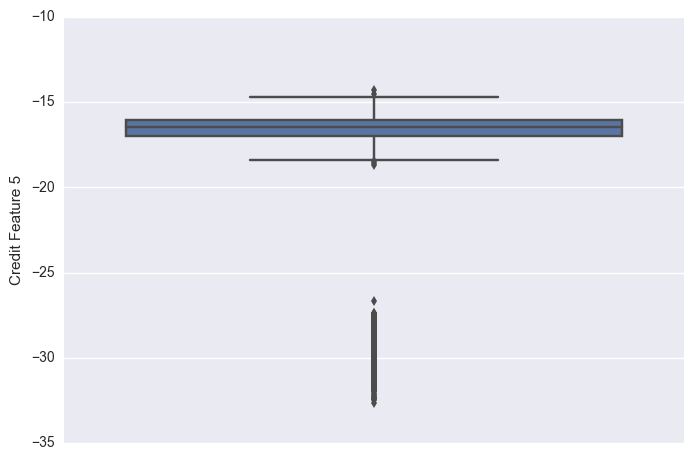

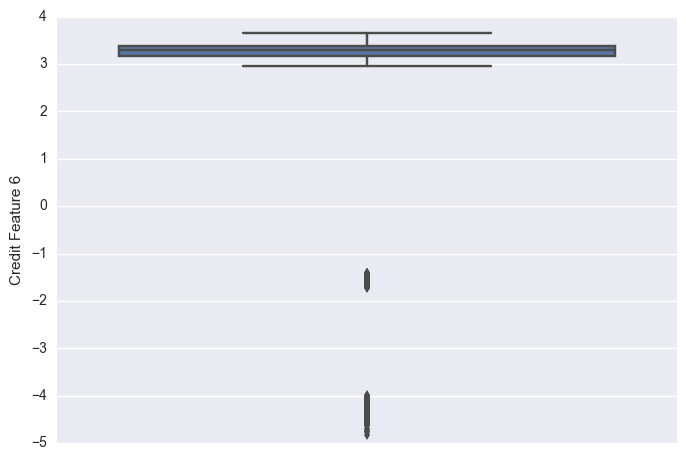

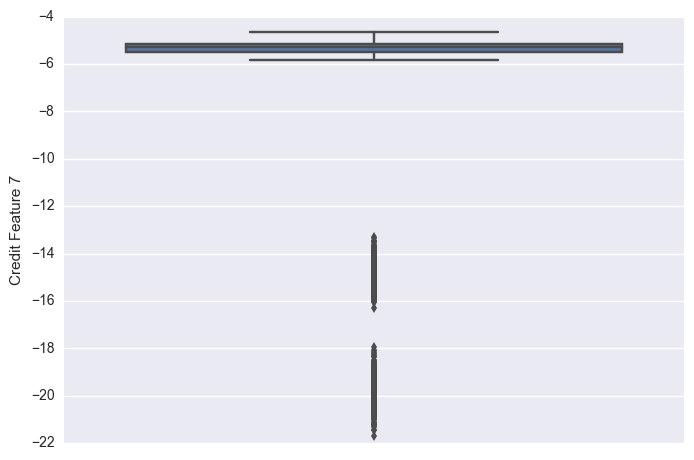

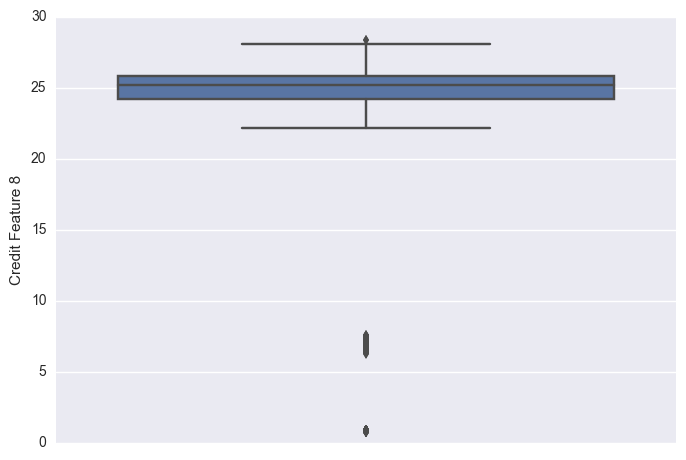

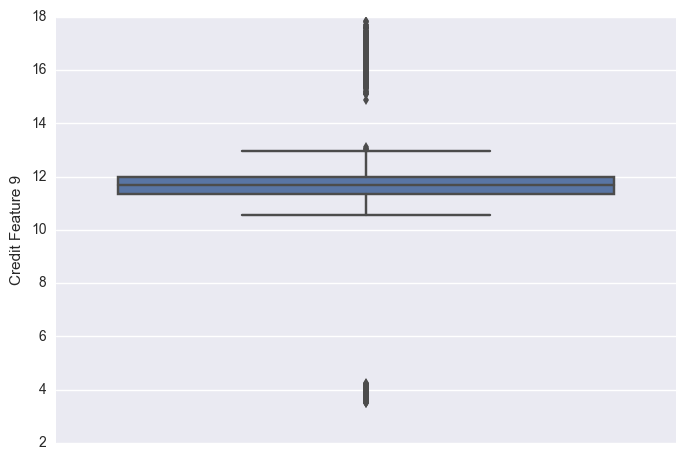

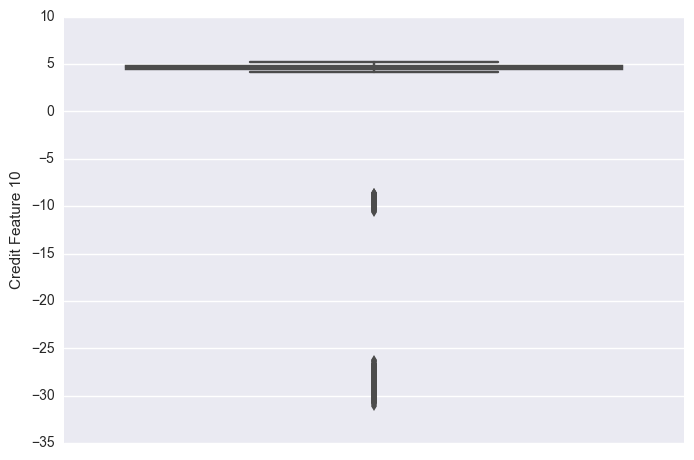

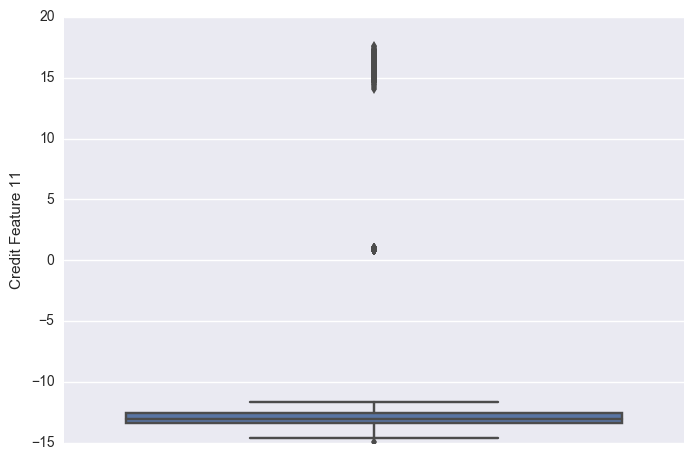

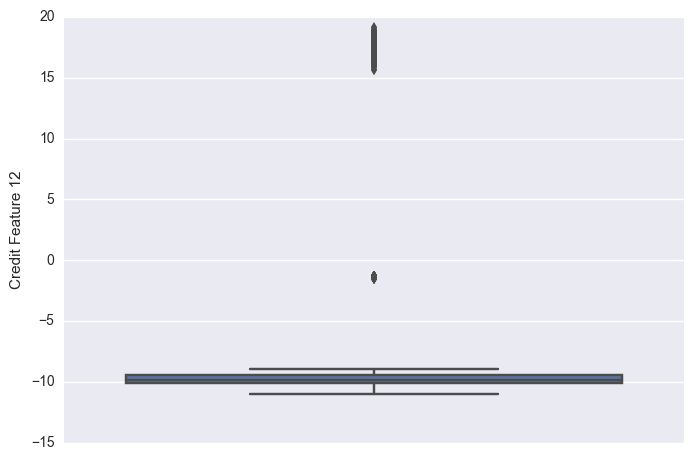

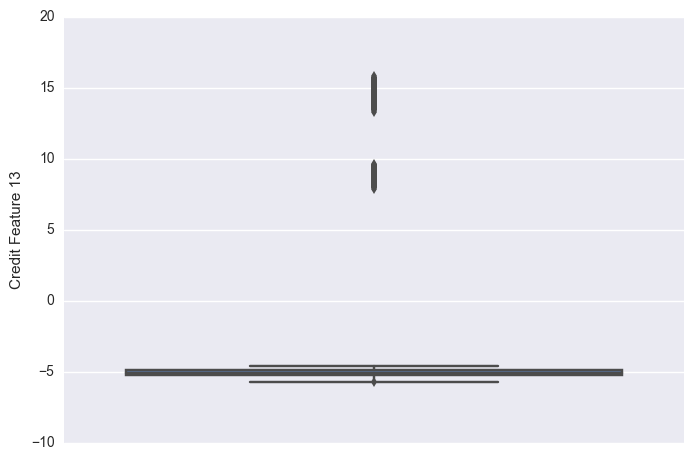

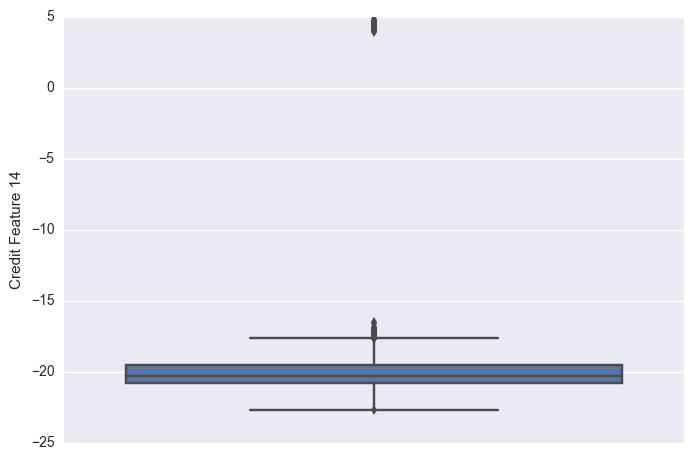

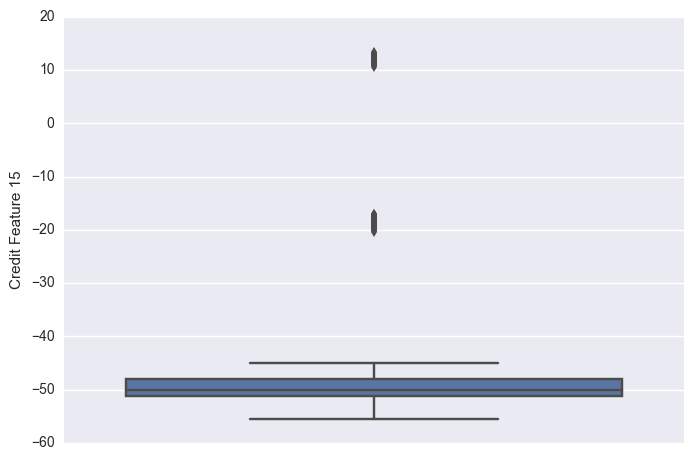

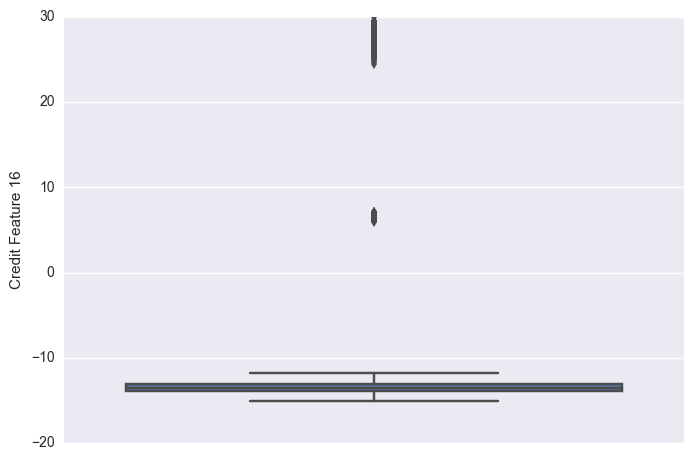

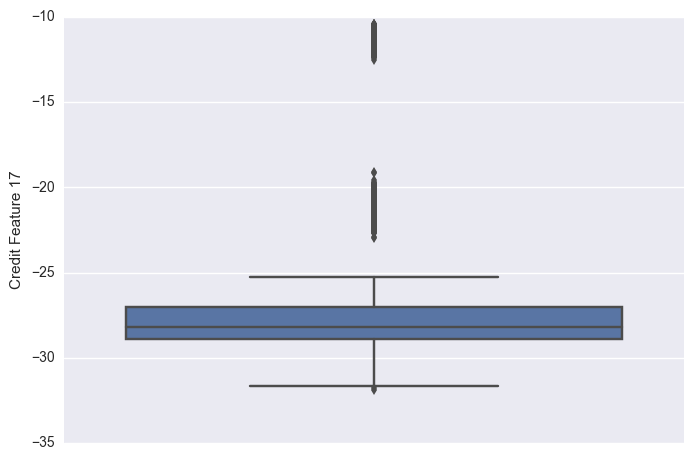

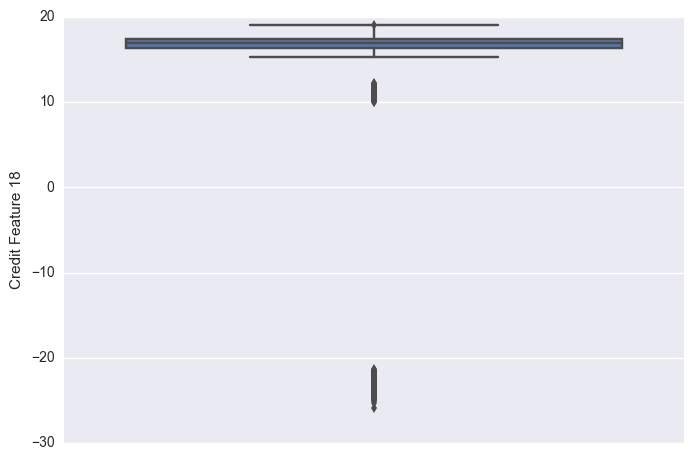

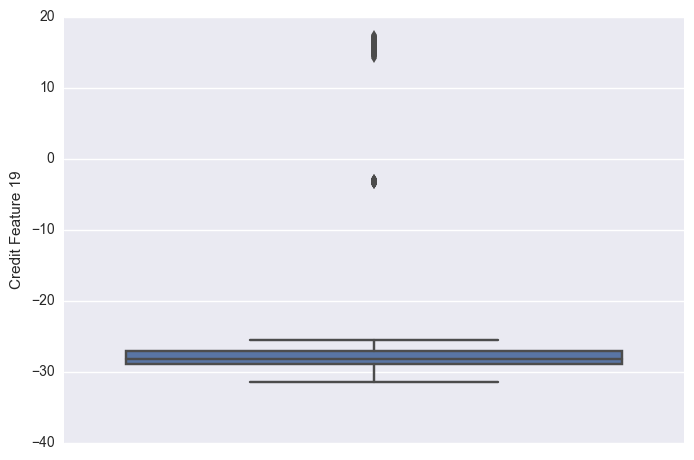

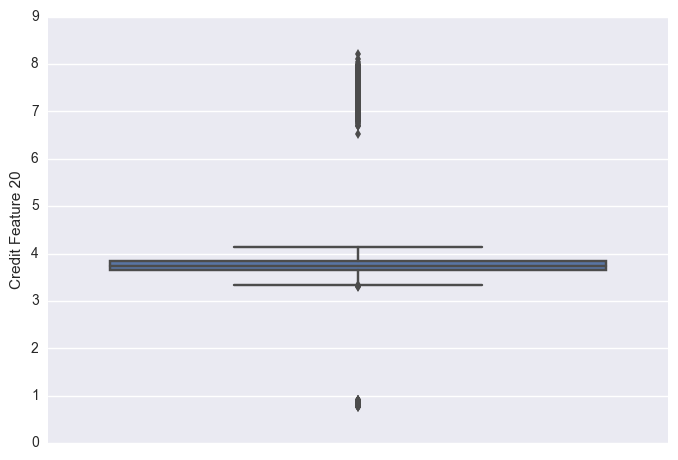

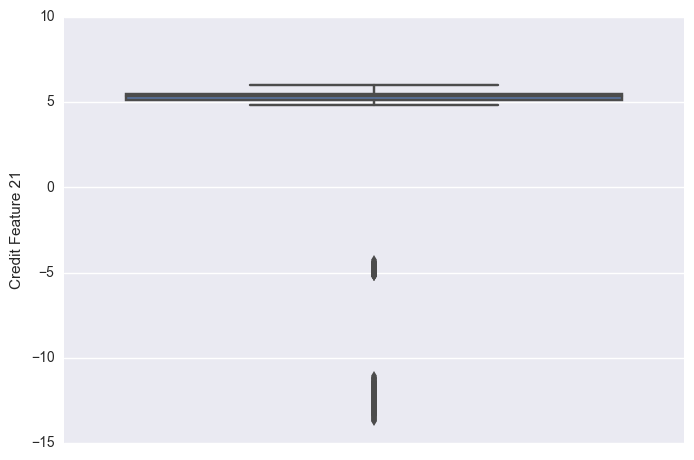

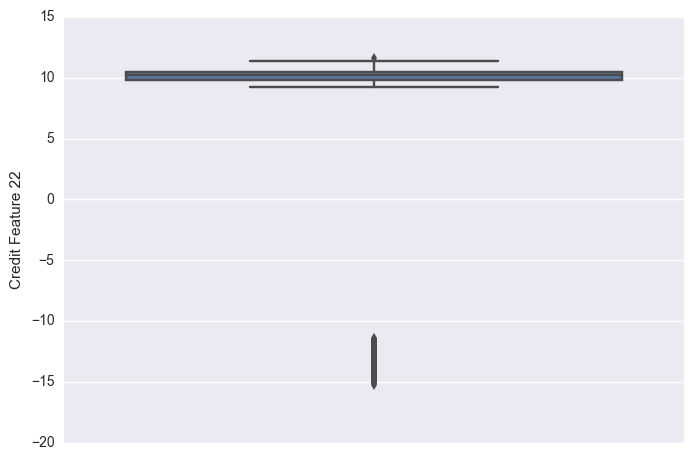

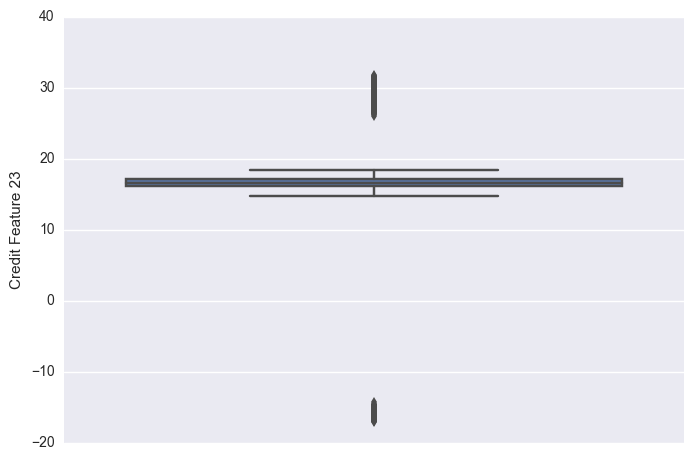

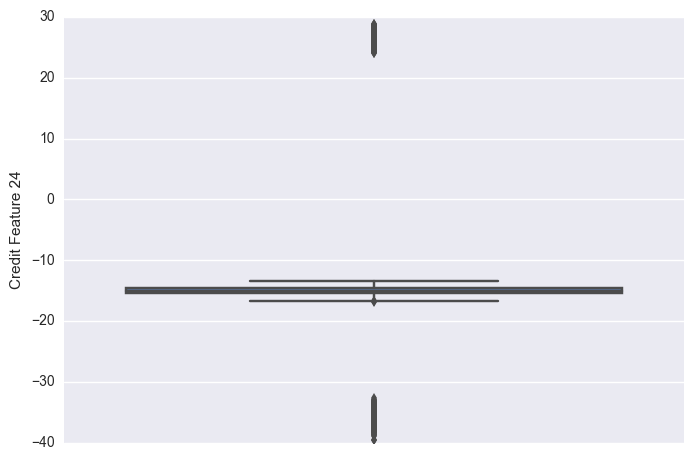

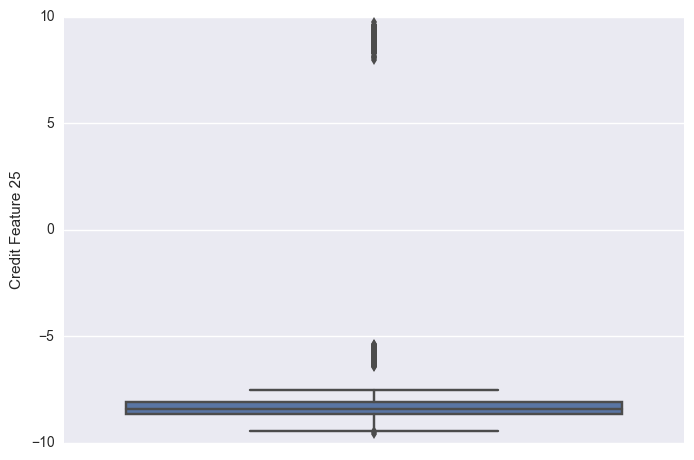

In [48]:
################charts boxplot for outlier information
for i in (data.filter(like='Credit')):
    credit_data_outlier=sns.boxplot(y=data[i])
    z=str(i)
    plt.figure()
    credit_data_outlier_fig=credit_data_outlier.get_figure()
    credit_data_outlier_fig.savefig("C:\\Users\\anupgaurav\\Documents\\Code\\Money\\before outlier management\\"+i+".png")

C:\Users\anupgaurav\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


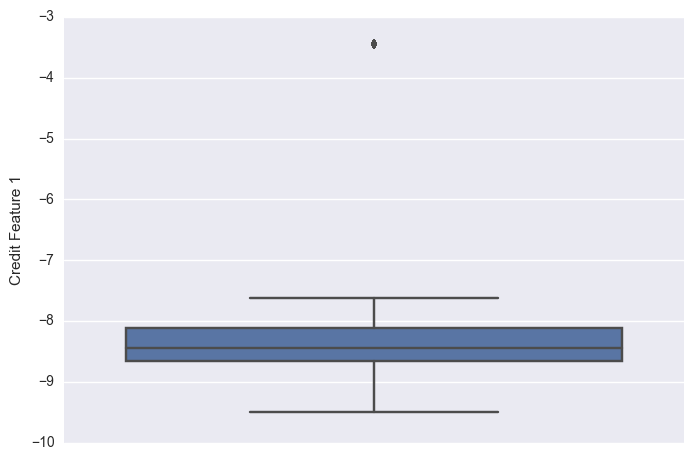

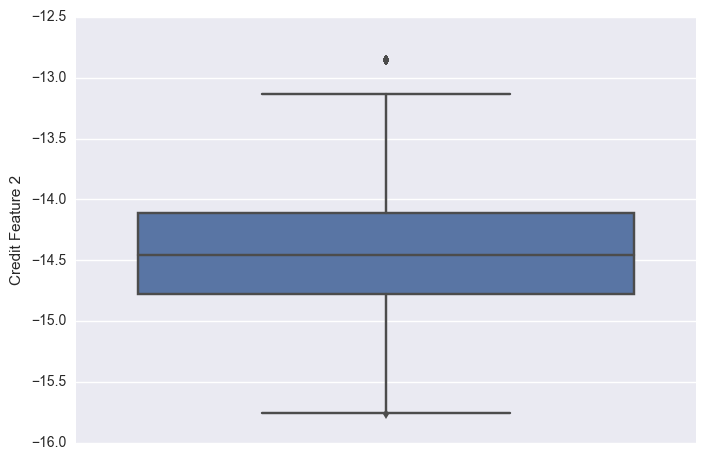

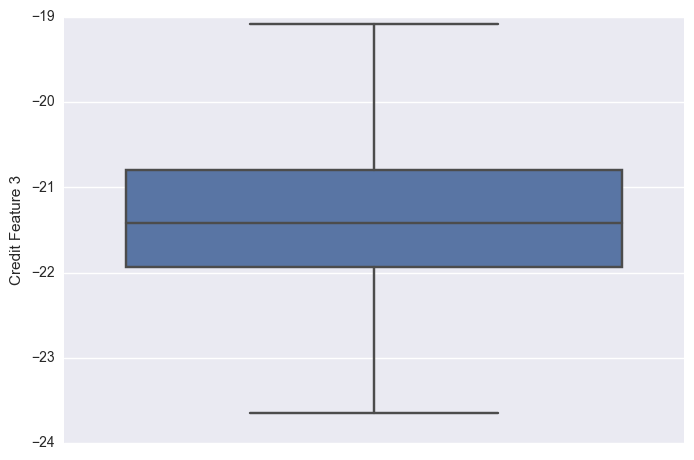

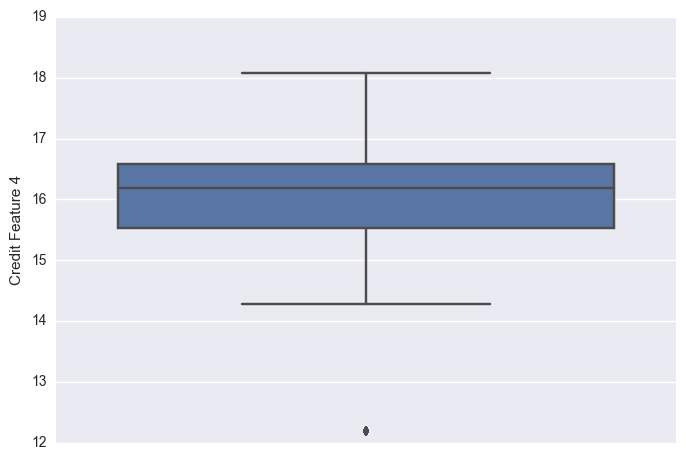

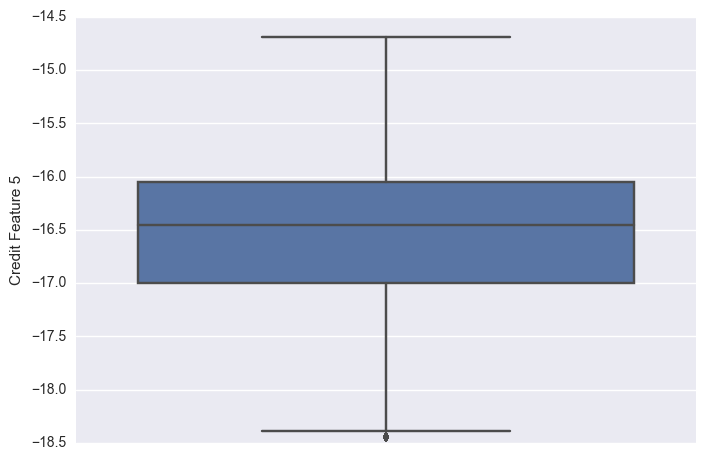

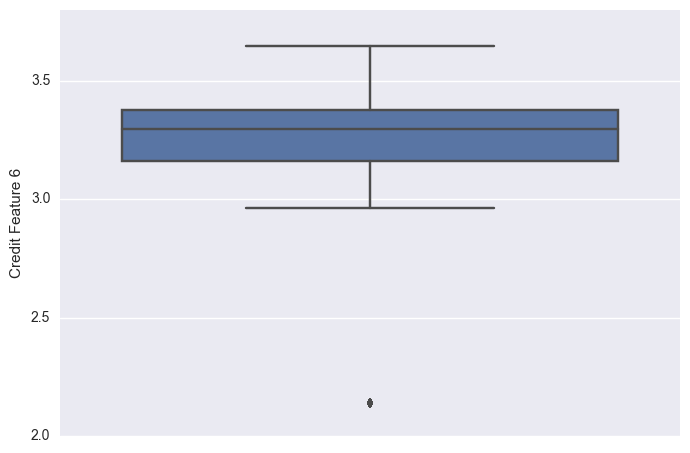

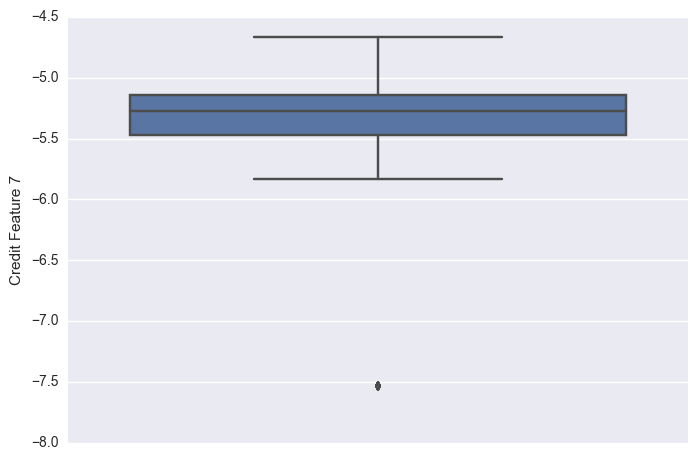

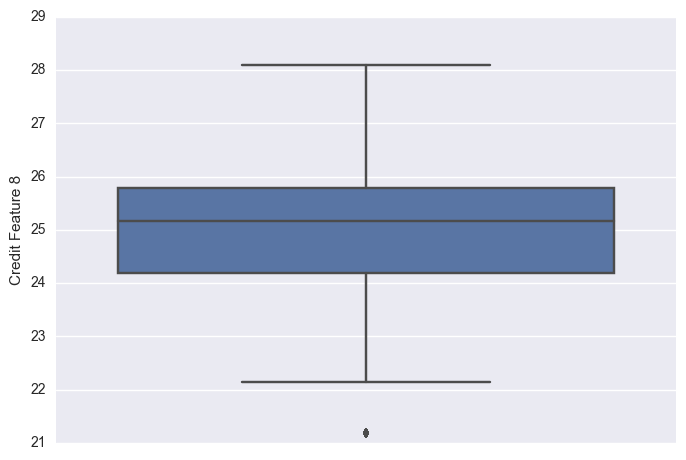

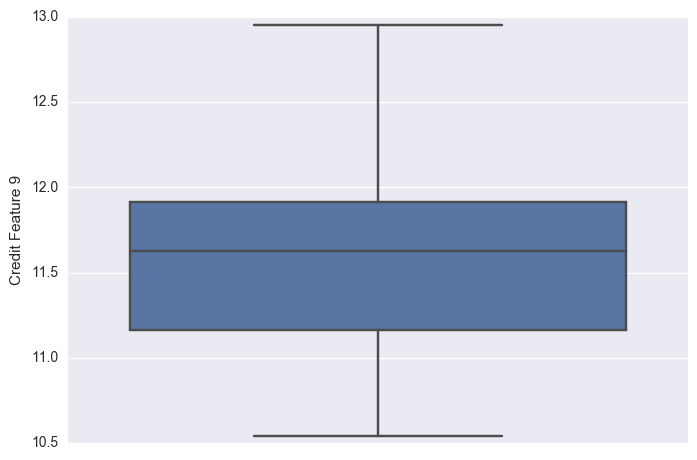

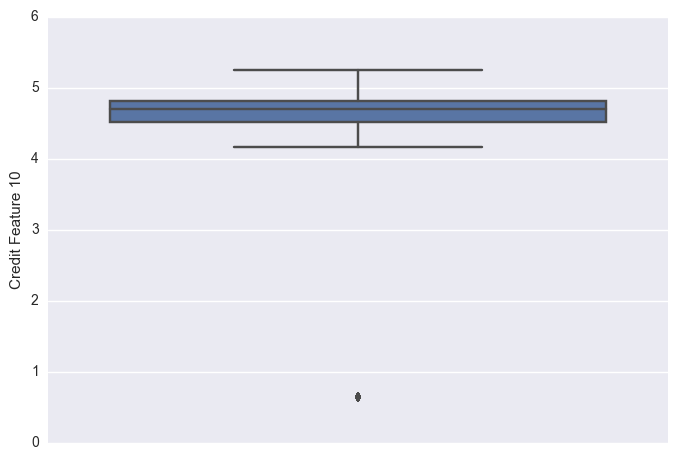

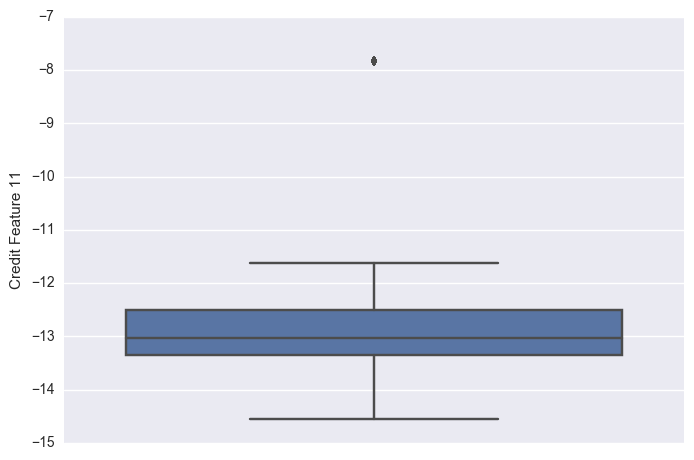

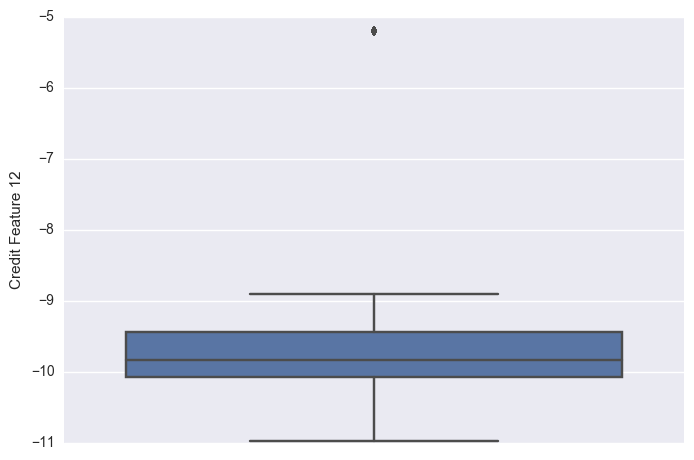

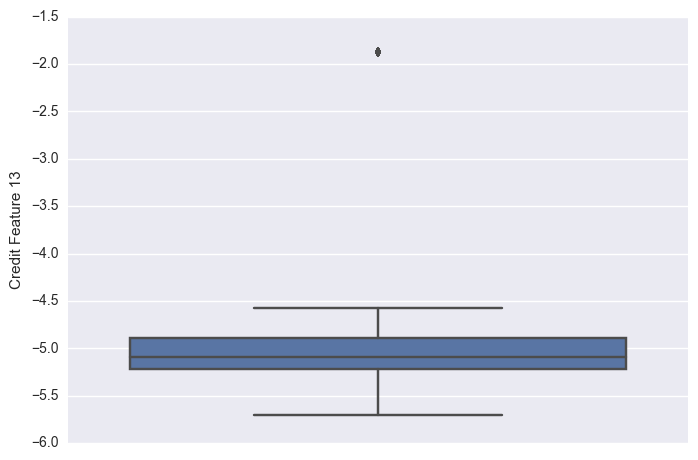

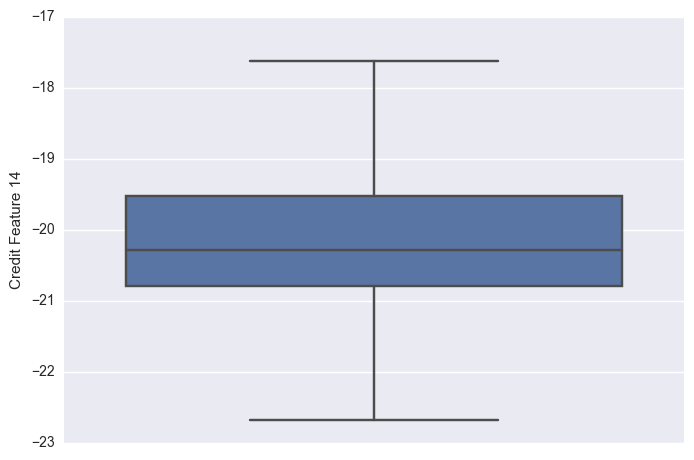

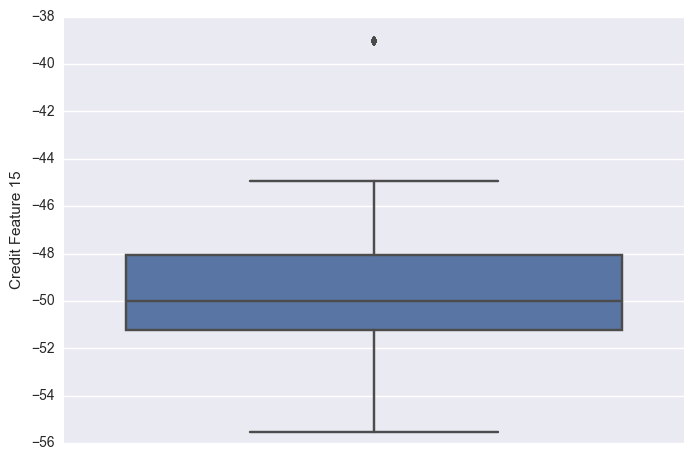

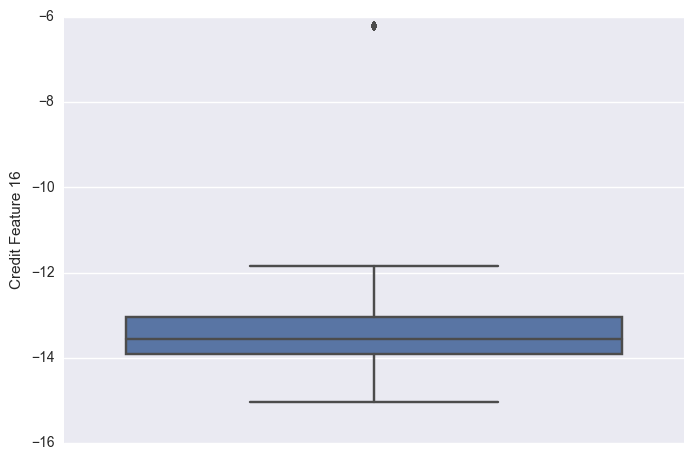

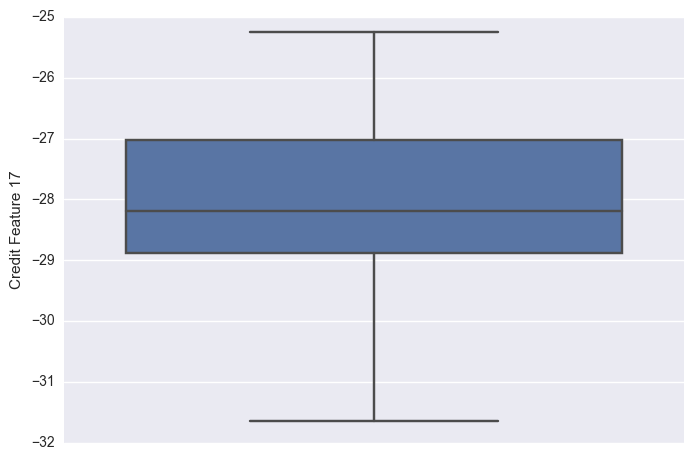

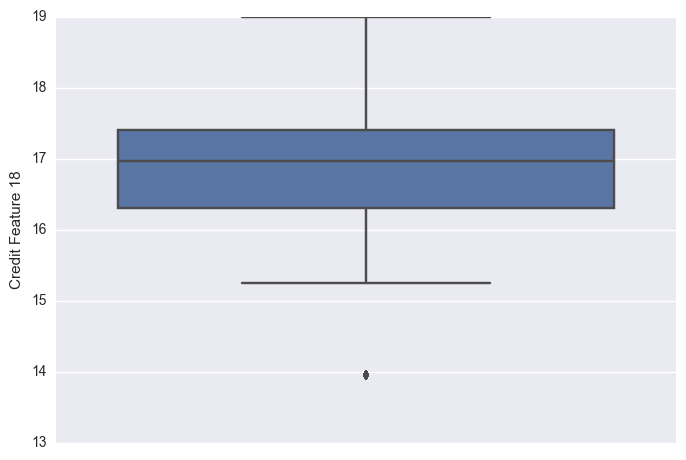

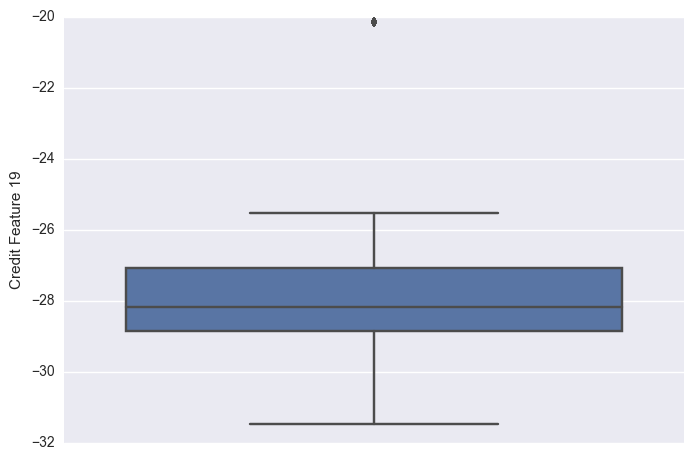

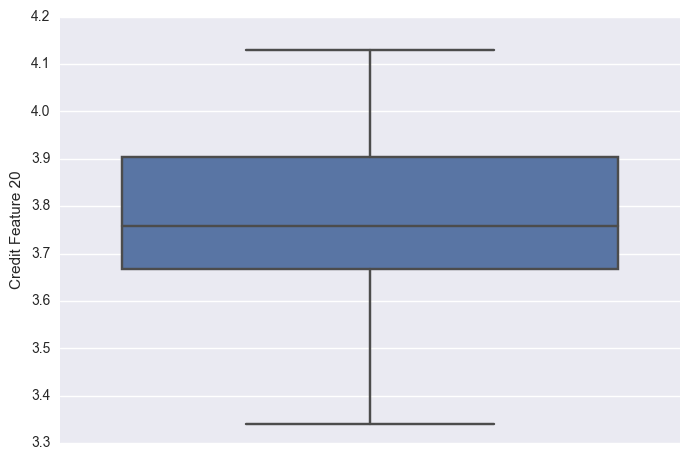

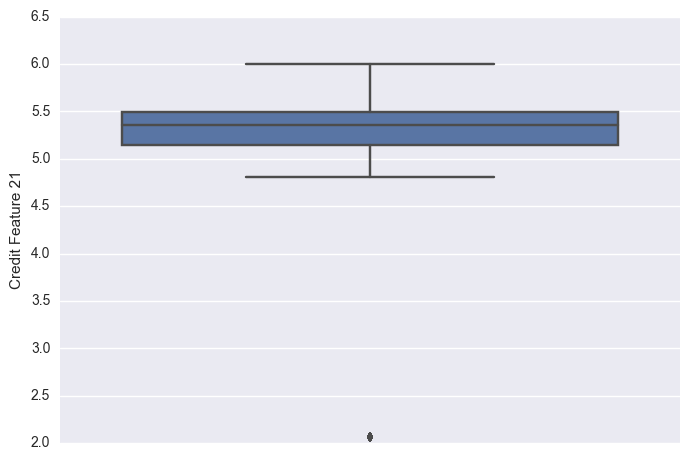

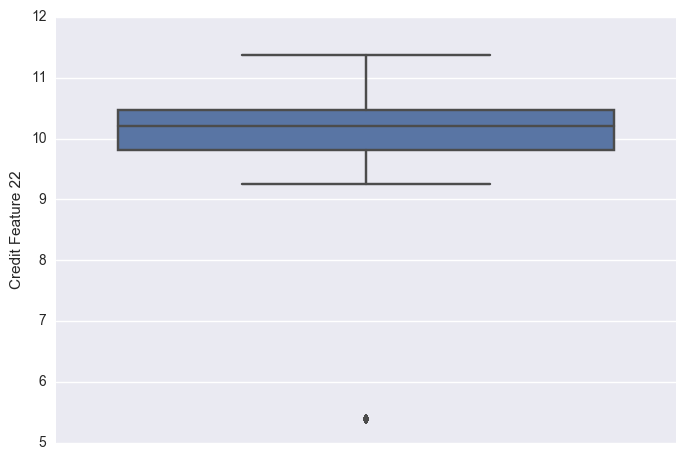

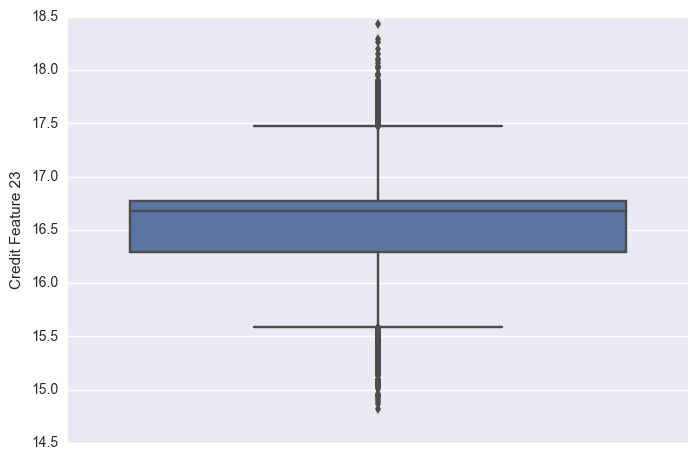

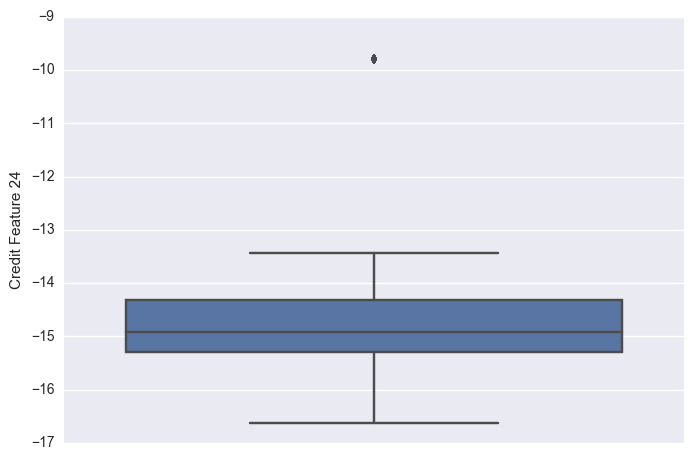

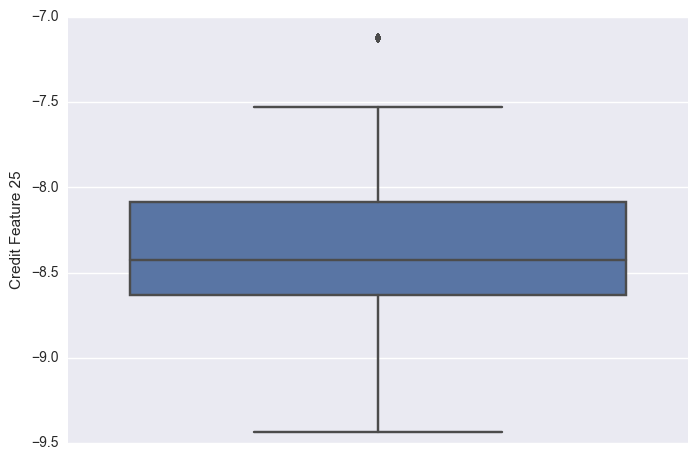

In [49]:
##########################charts boxplot after managing outliers  by substituting mean with entries <1.5* IQR and >1.5*IQR
for i in (data.filter(like='Credit')):
    mean_data=data[i].mean()
    q75, q25 = np.percentile(data[i], [75 ,25])
    iqr = q75 - q25
    data.loc[(data[i]>(q75+(1.5*iqr))) | (data[i]<(q25-(1.5*iqr))),i]=mean_data
    credit_data_edited=sns.boxplot(y=data[i])
    z=str(i)
    plt.figure()
    credit_data_edited_fig=credit_data_edited.get_figure()
    credit_data_edited_fig.savefig("C:\\Users\\anupgaurav\\Documents\\Code\\Money\\after outlier management\\"+ i+".png")

C:\Users\anupgaurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\anupgaurav\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


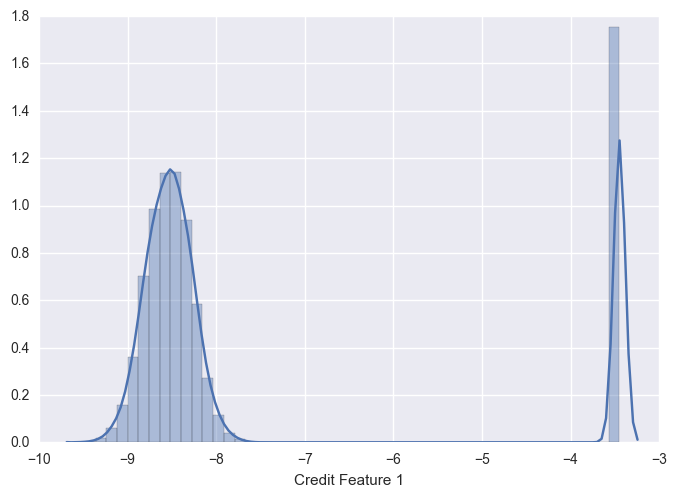

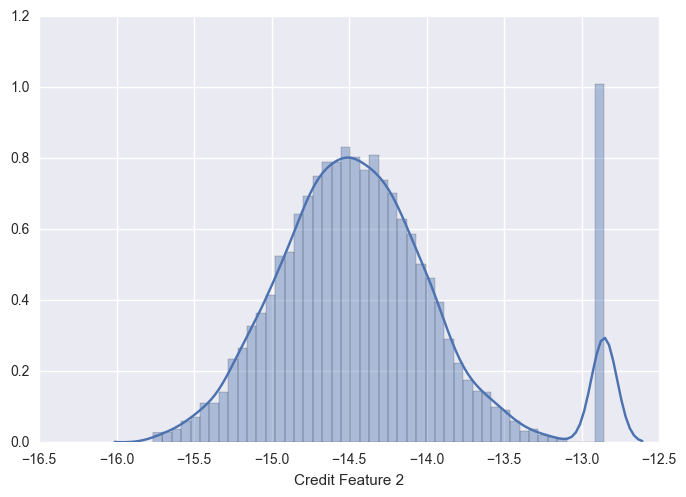

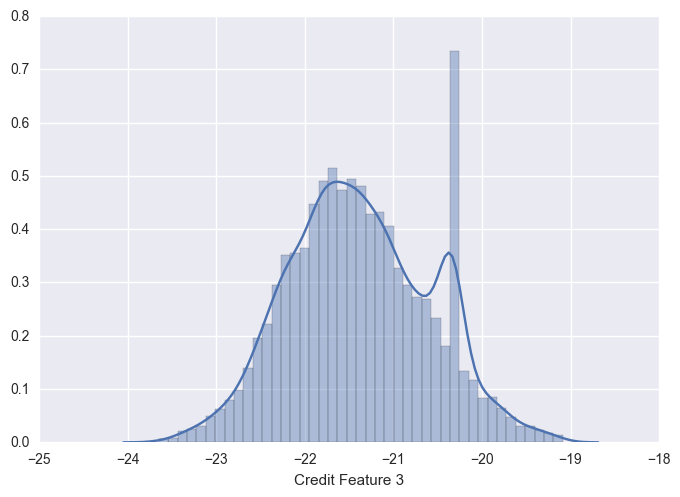

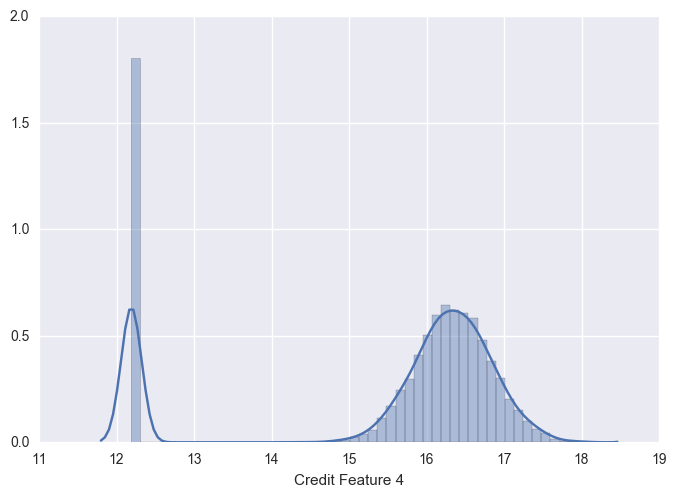

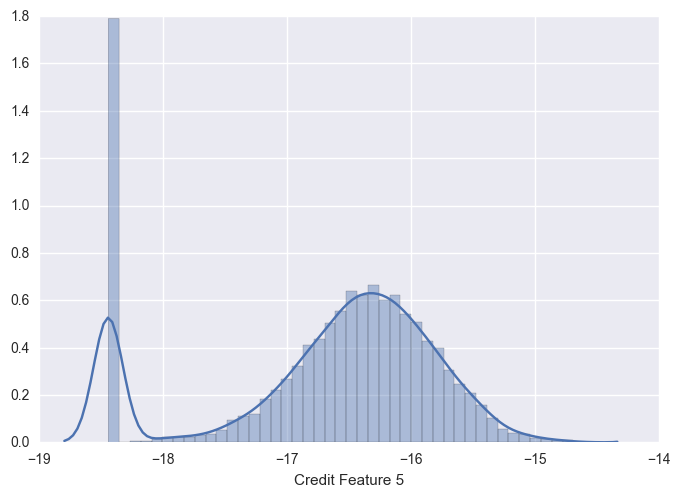

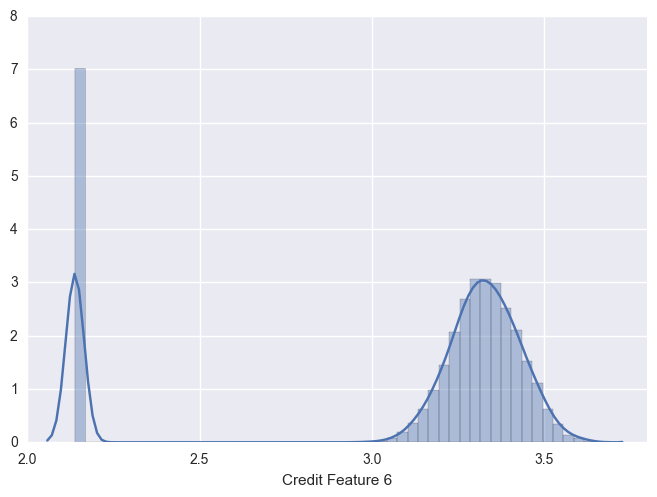

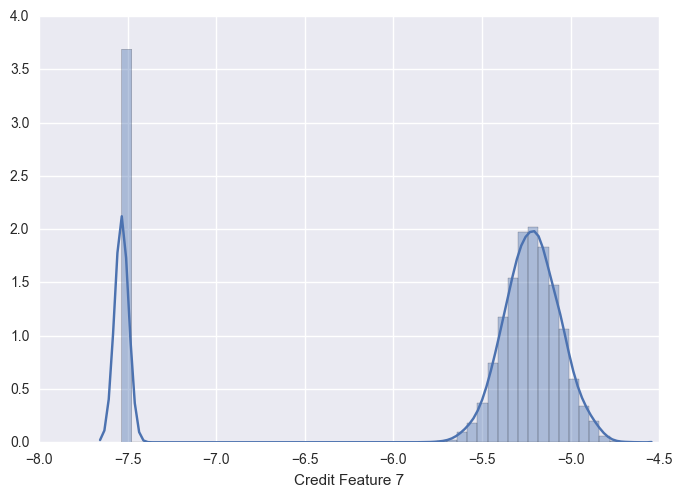

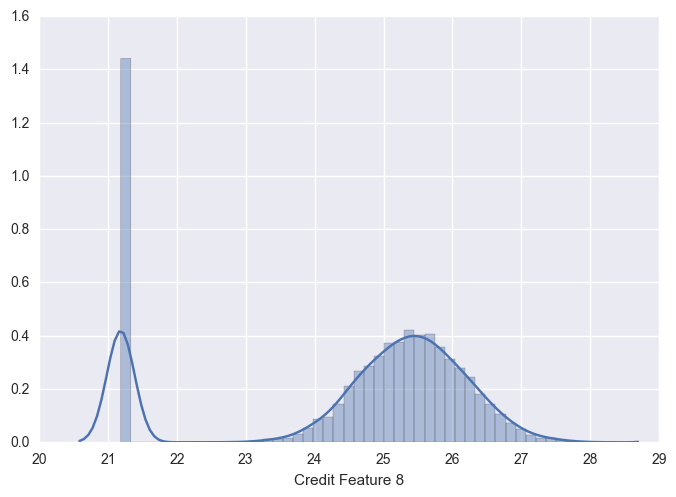

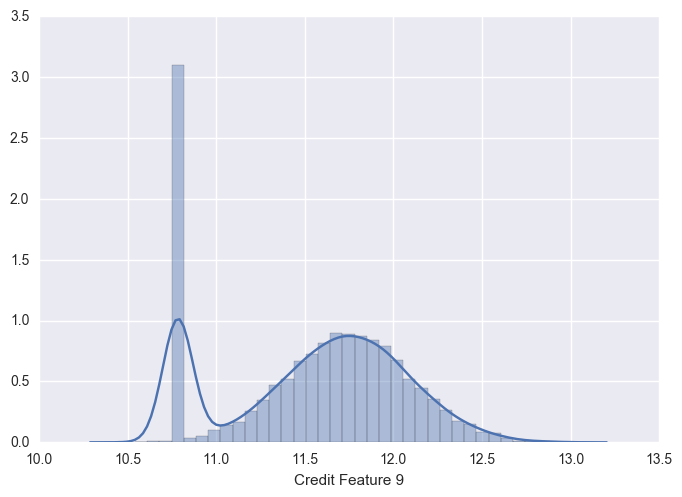

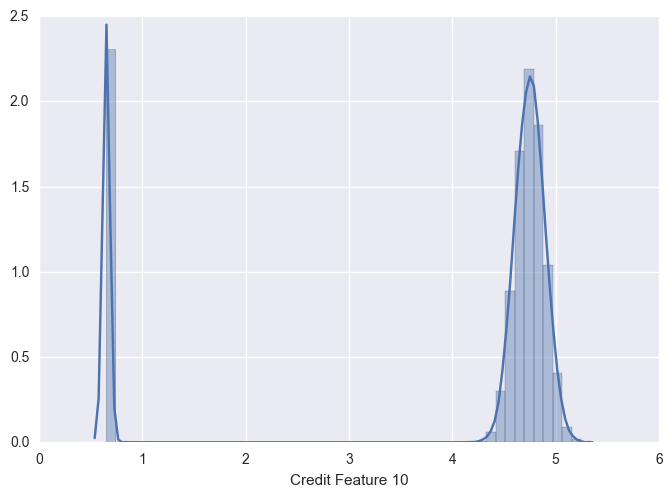

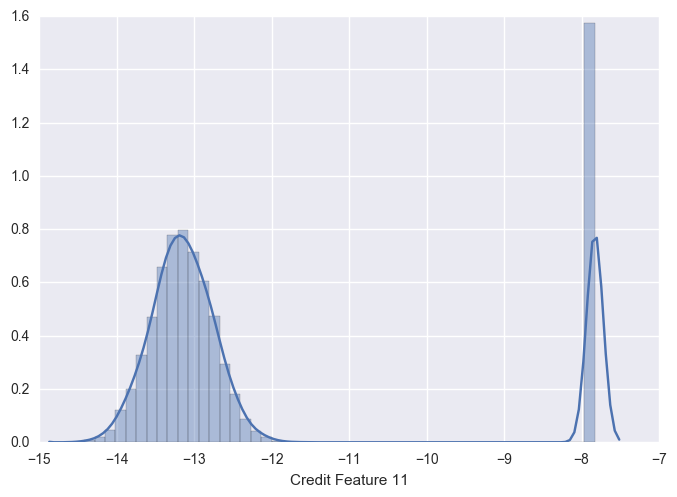

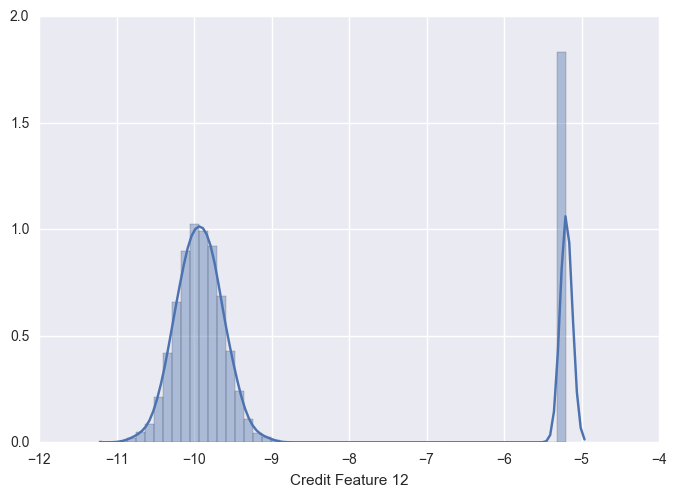

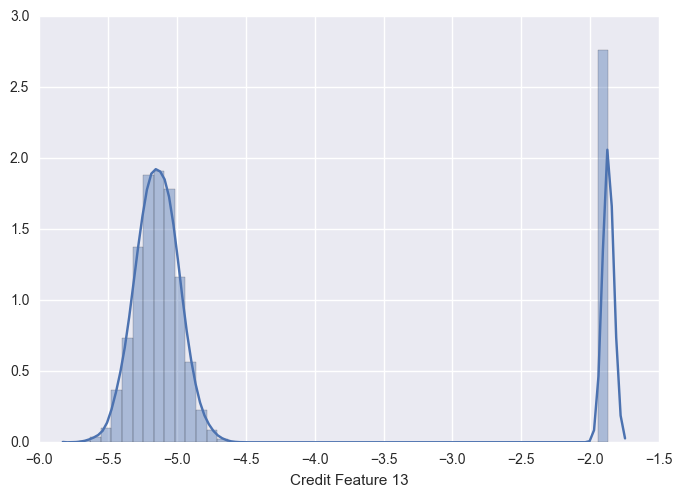

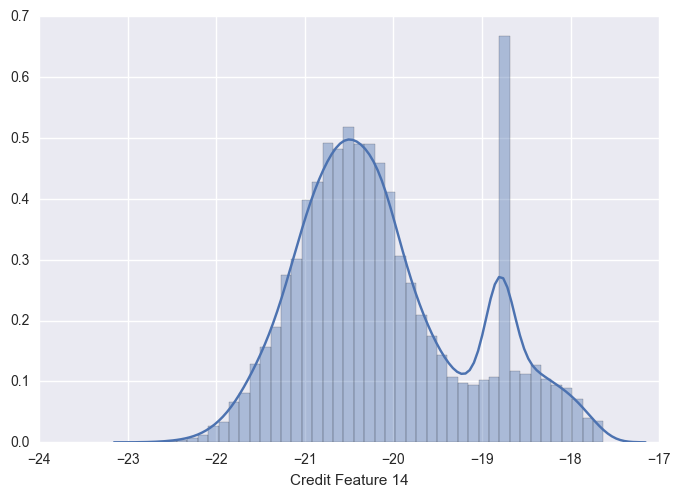

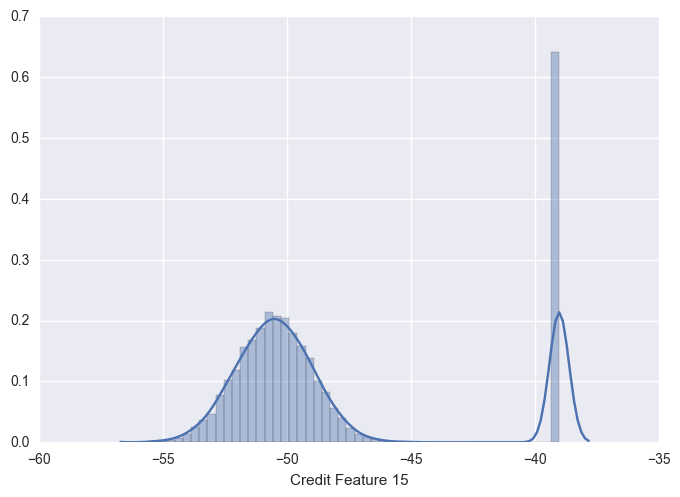

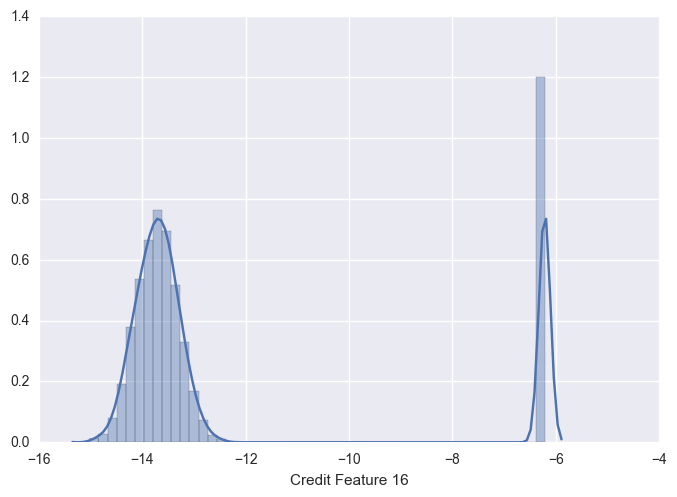

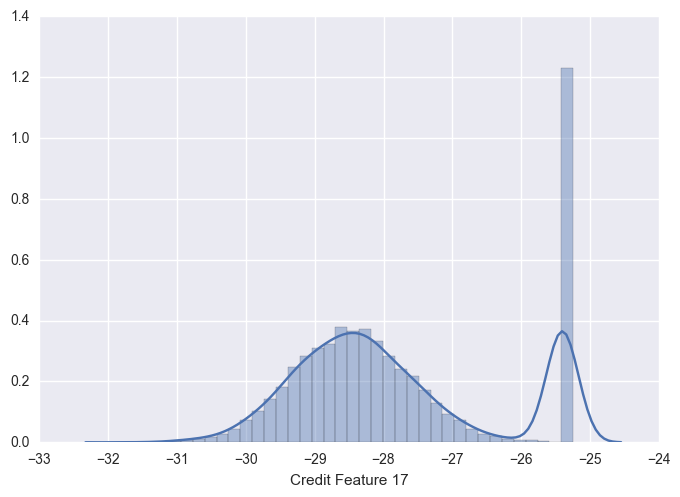

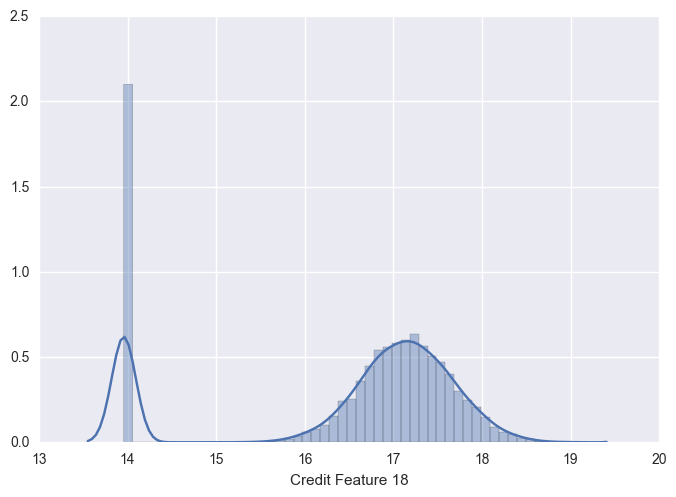

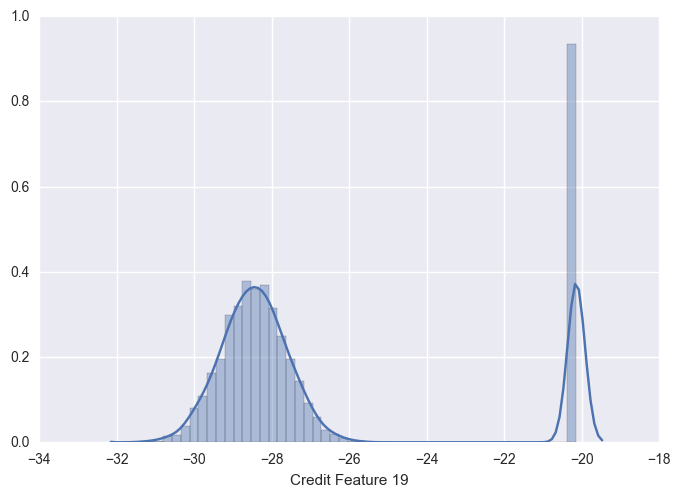

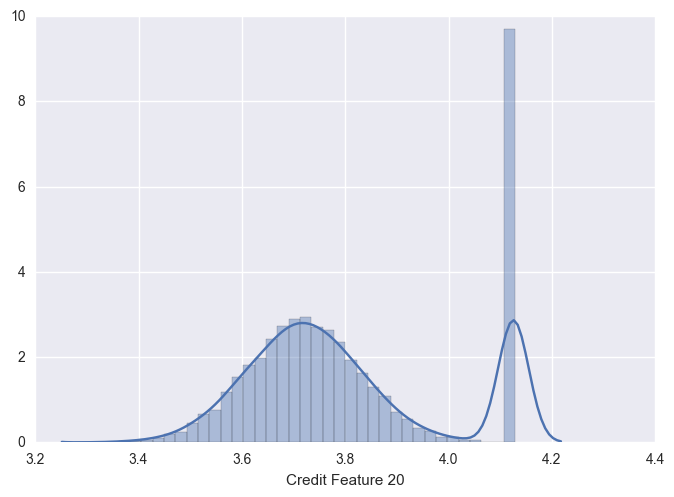

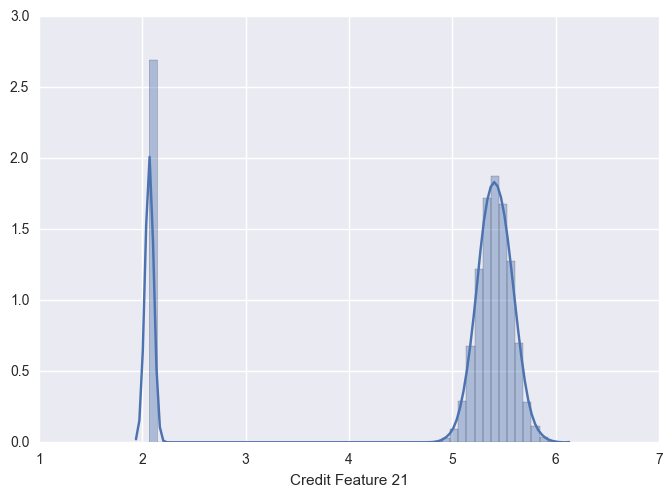

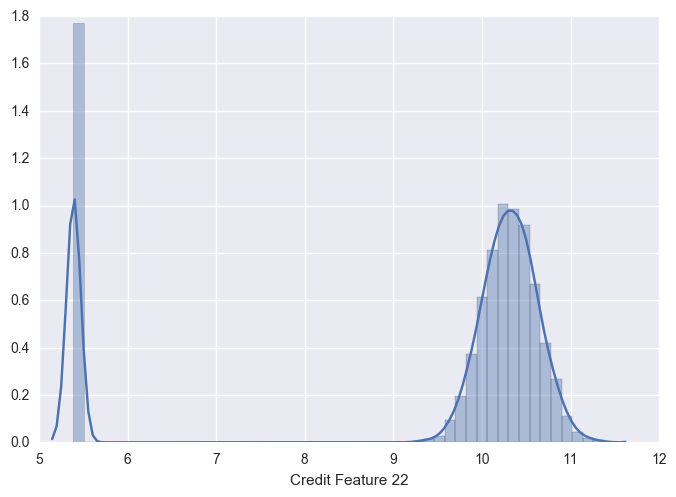

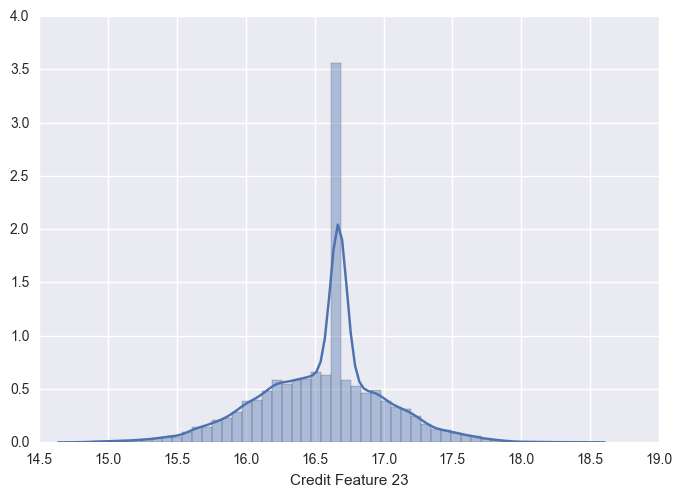

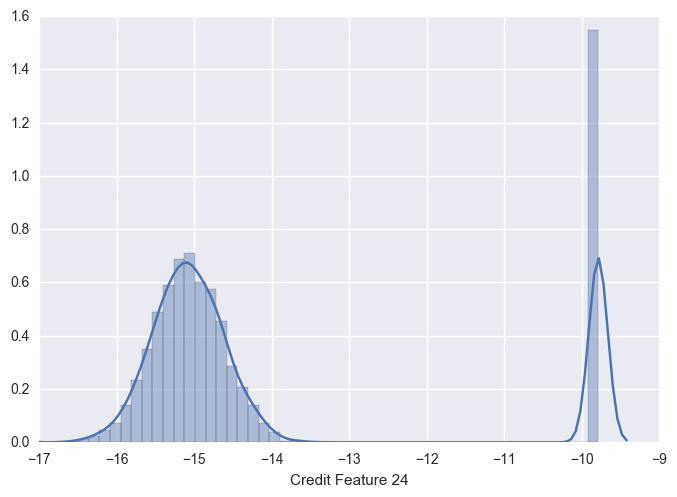

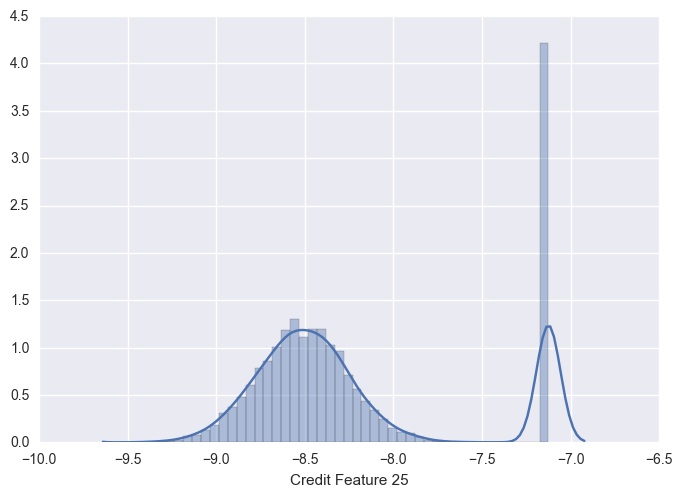

In [50]:
##########################charts to analyze distribution
for i in (data.filter(like='Credit')):
    credit_data_dist=sns.distplot(data[i])
    z=str(i)
    plt.figure()
    credit_data_dist_fig=credit_data_dist.get_figure()
    credit_data_dist_fig.savefig("C:\\Users\\anupgaurav\\Documents\\Code\\Money\\credit valraible distribution\\"+i+".png")

######################

### all the credit variables are normally distributed after outlier management. 
######################

### Their some values withing 1.5*IQr range but appear to be outliers that  can be omitted or sustituted by mean

### Analyze the credit variables with Loan repayment

C:\Users\anupgaurav\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


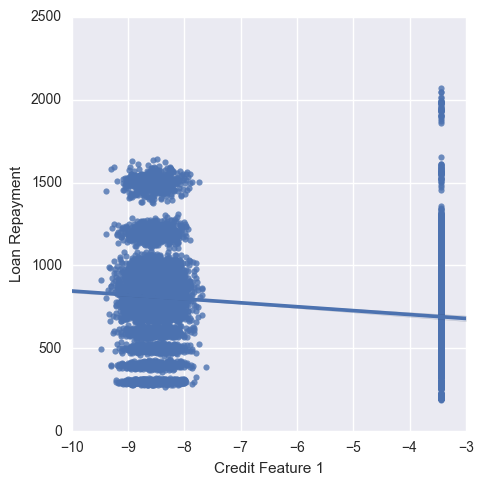

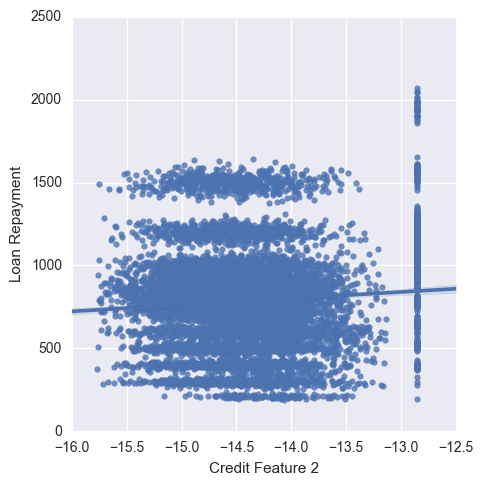

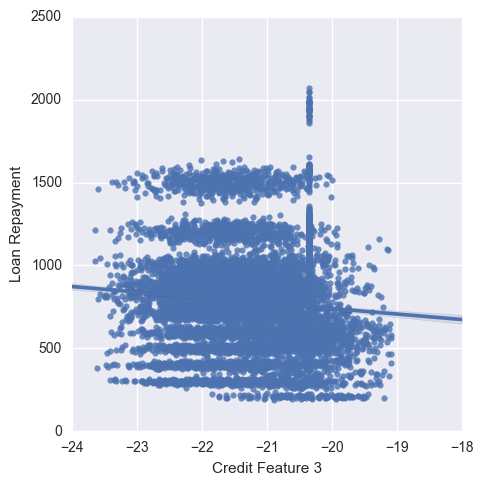

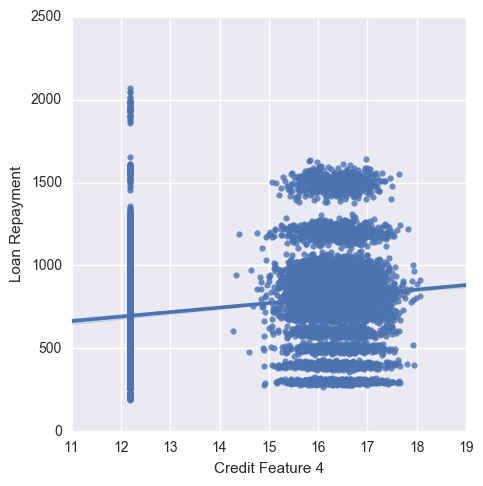

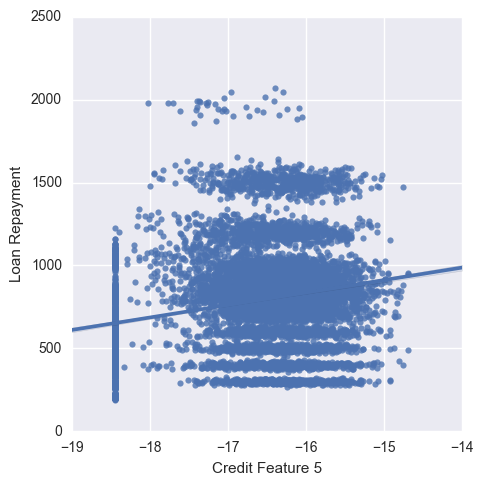

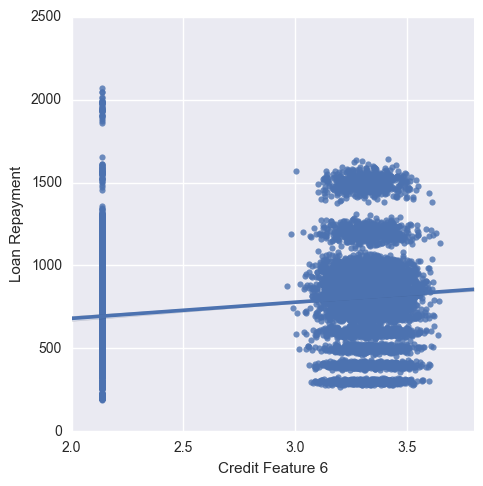

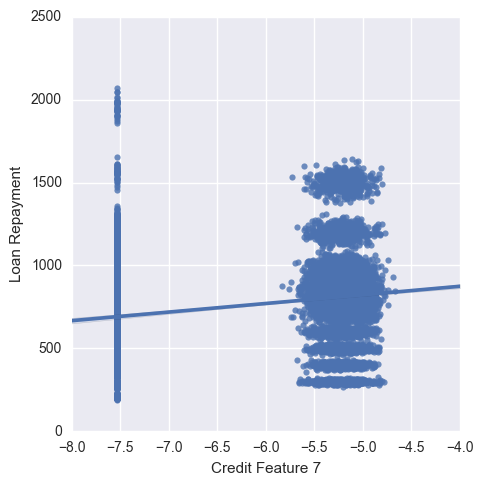

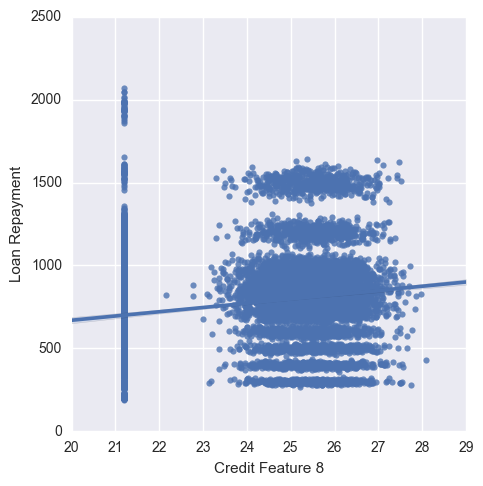

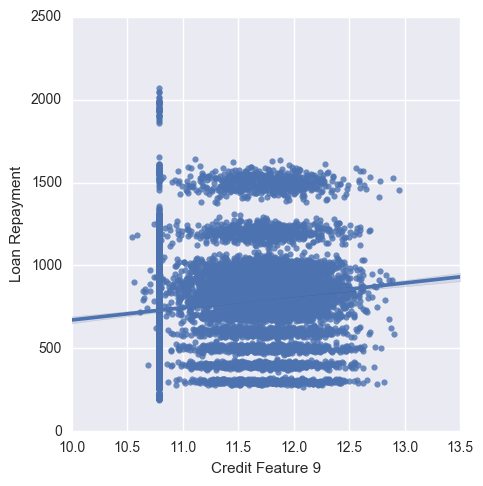

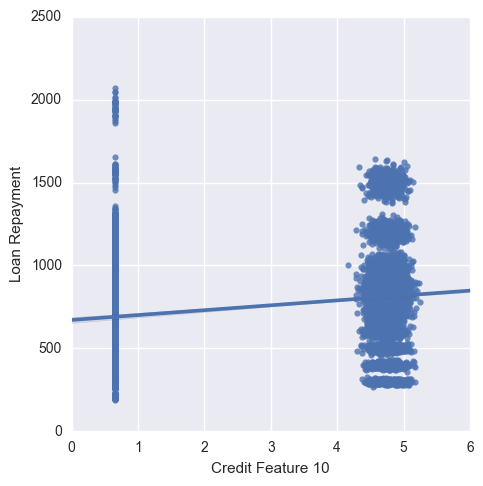

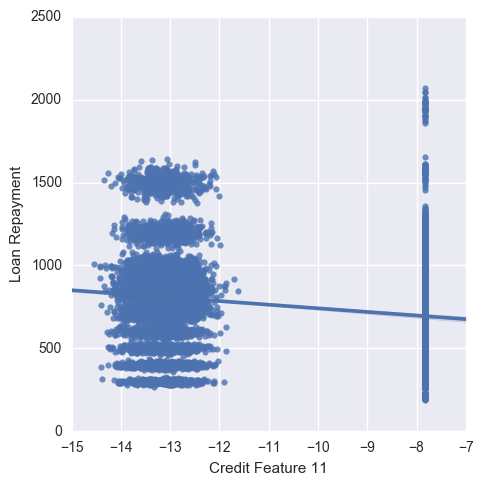

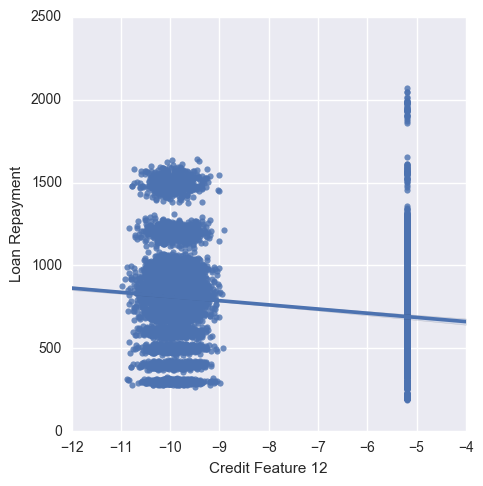

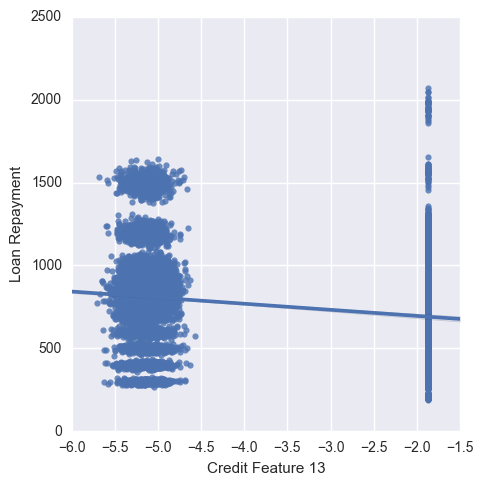

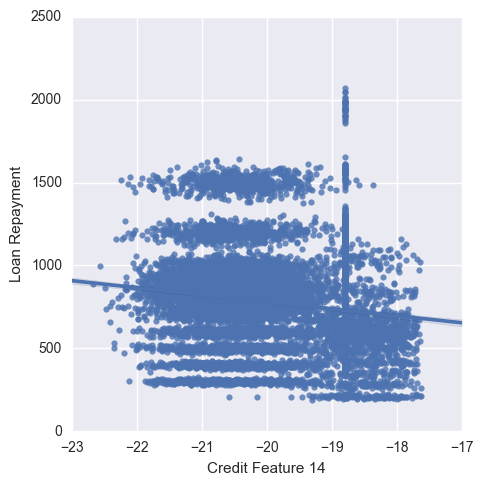

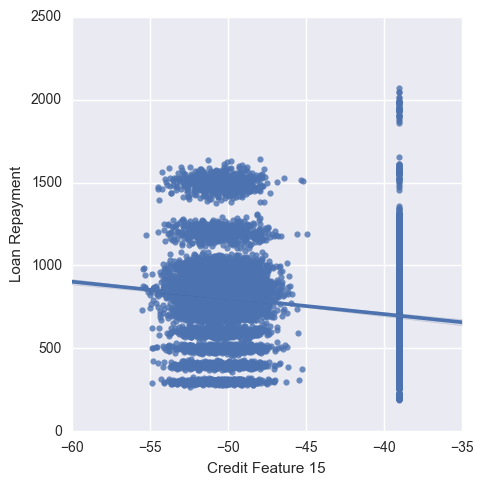

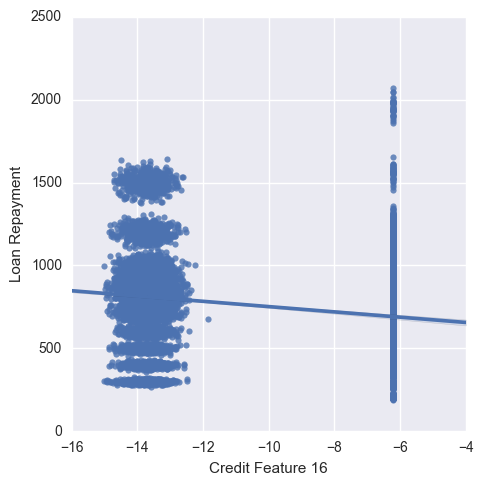

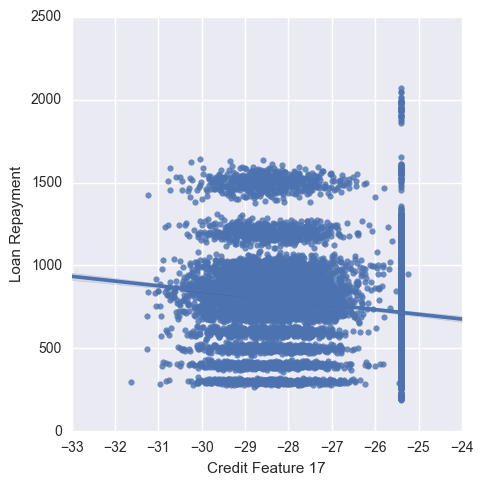

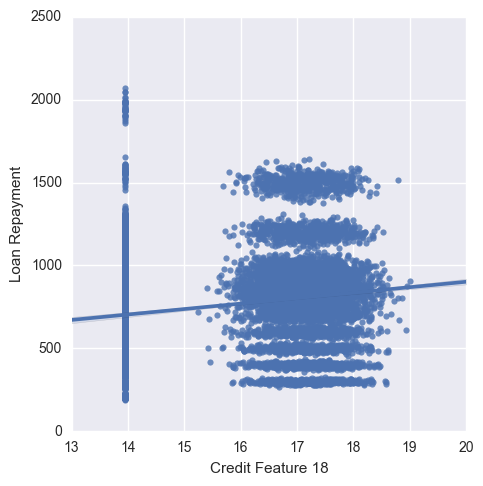

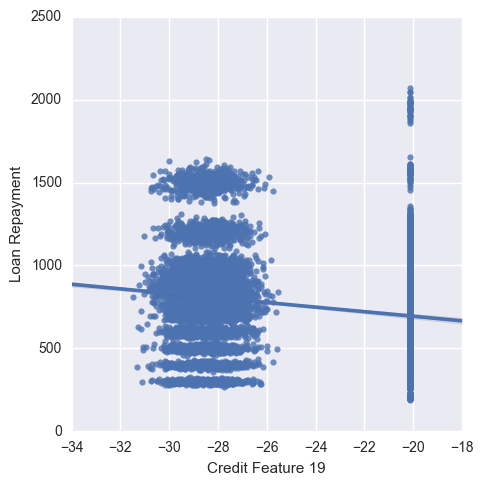

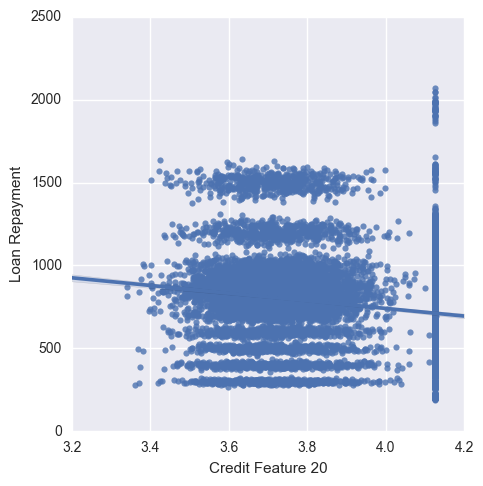

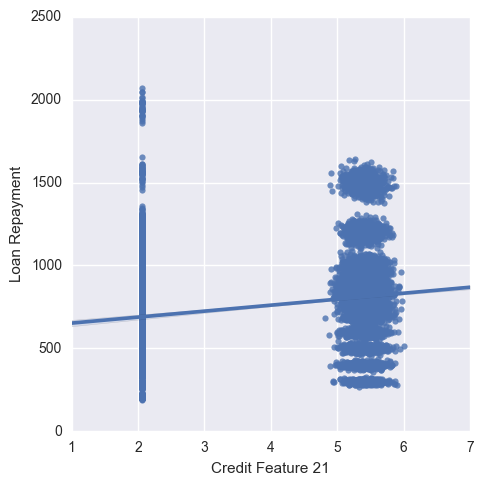

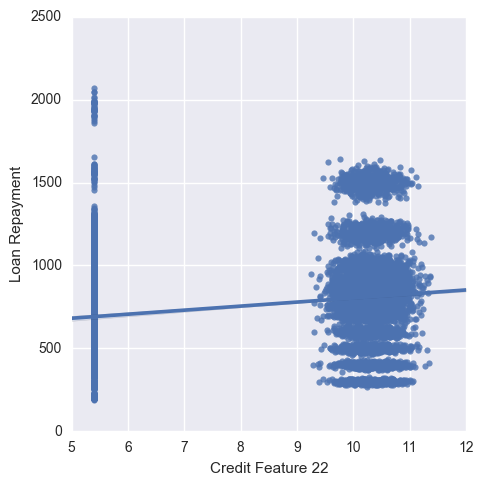

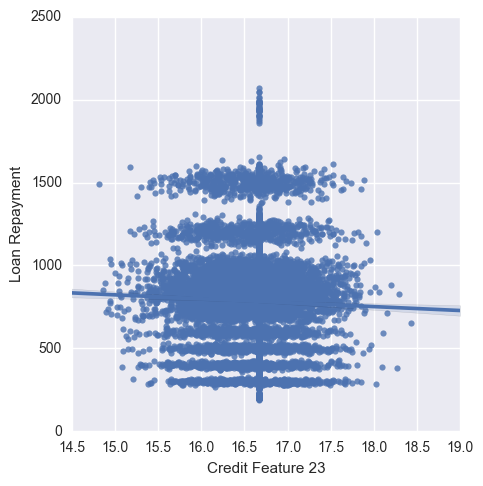

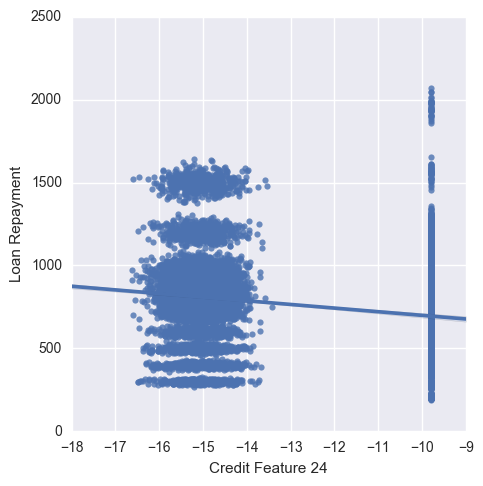

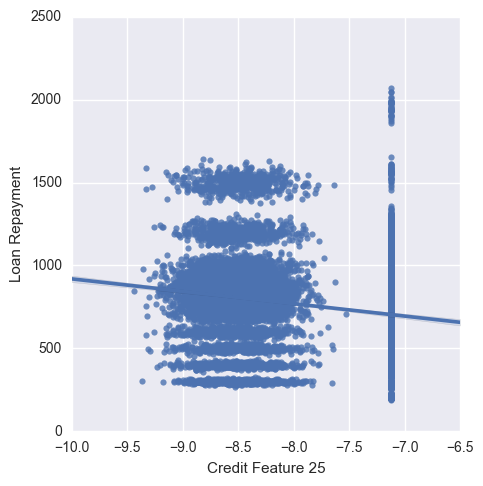

In [51]:
##########################charts to analyze distribution
for i in (data.filter(like='Credit')):
    credit_data_relation=sns.lmplot(x=i, y='Loan Repayment',data=data)
    z=str(i)
    plt.figure()
    credit_data_relation.savefig("C:\\Users\\anupgaurav\\Documents\\Code\\Money\\other\\"+i+".png")

### Credit variables seem to be an important information as far as Loan Repayment is considered

C:\Users\anupgaurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


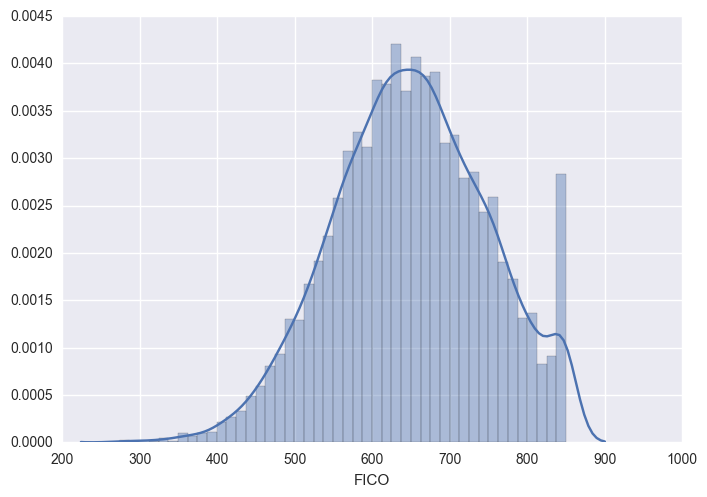

In [52]:
sns.distplot(data['FICO'])

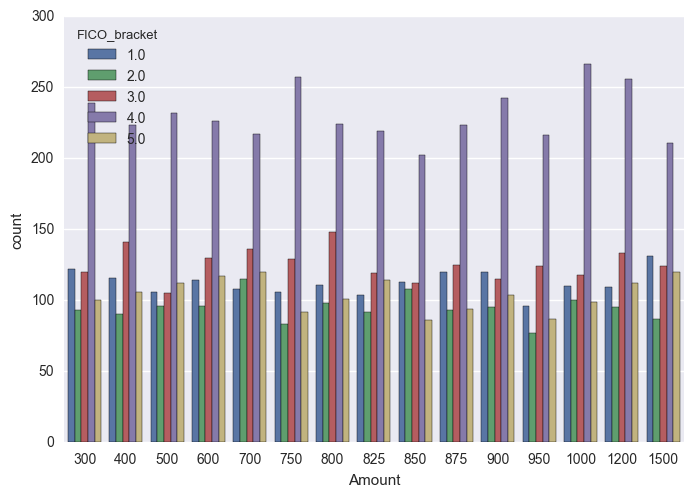

In [53]:
sns.countplot(x='Amount', data=data, hue='FICO_bracket')

### Most of the applications approved are for users with low FICO score. This might show as they have low credit score might not ba able to secure loans from bank and thus opt to other options. Brackets are made in above part of the code.

In [54]:
data_frame_plot=data.groupby(['FICO_bracket']).size().reset_index()
data_frame_plot.columns=['FICO_bracket', 'Count']
data_frame_plot['Percentage'] = 100 * data_frame_plot['Count']  / data_frame_plot['Count'].sum()
data_frame_plot

FICO_bracket  Count  Percentage
0           1.0   1686       16.86
1           2.0   1418       14.18
2           3.0   1879       18.79
3           4.0   3453       34.53
4           5.0   1564       15.64

### Above table shows that most of the applications are from lower FICO scored users

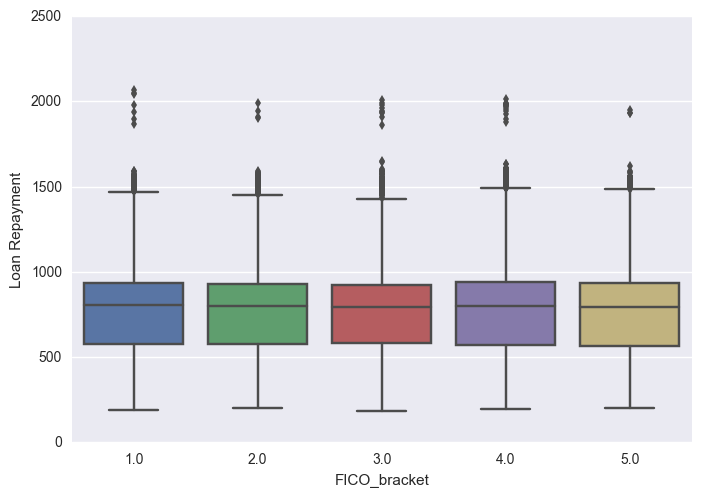

In [55]:
sns.boxplot(y='Loan Repayment', x='FICO_bracket', data=data)

### Users with high FICO score tend to pay high loan amounts quicker. This can be interpreted by outliers in boxplot.

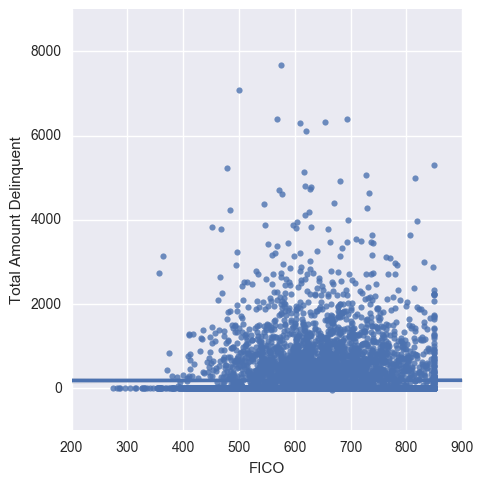

In [56]:
# lm=sns.lmplot(y='Total Amount Delinquent', x='Loan Repayment', data=data, col='Home Ownership', fit_reg=False, hue='Home Ownership')
lm=sns.lmplot(y='Total Amount Delinquent', x='FICO', data=data)

### Users with Low FICO have high historical Delinquet Amount

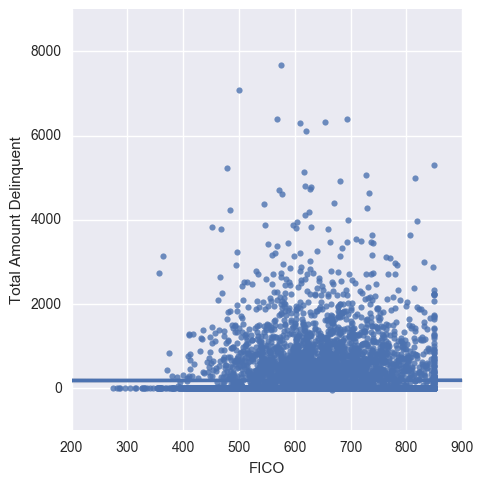

In [57]:
lm=sns.lmplot(y='Total Amount Delinquent', x='FICO', data=data)

### Users with high historical delinquent amount tend to be approved for lower Amount of loan

### Analyze Salary percentage with respect to Loan Repayment

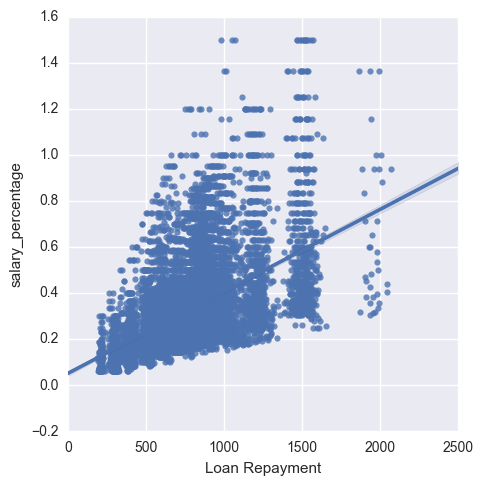

In [58]:
sns.lmplot(x='Loan Repayment', y='salary_percentage', data=data)

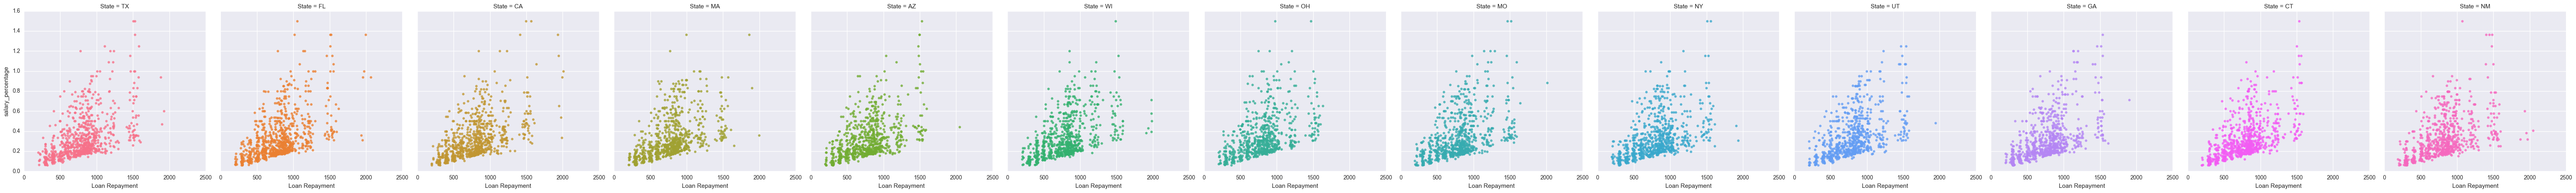

In [59]:
lm=sns.lmplot(y='salary_percentage', x='Loan Repayment', data=data, col='State', fit_reg=False, hue='State')
lm.set(ylim=(0, None))

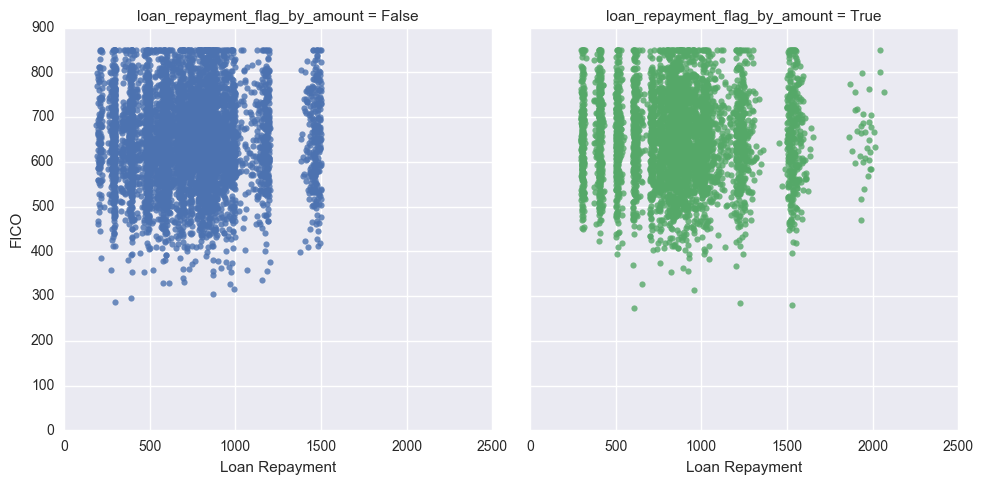

In [60]:
lm=sns.lmplot(y='FICO', x='Loan Repayment', data=data, col='loan_repayment_flag_by_amount', fit_reg=False, hue='loan_repayment_flag_by_amount')
lm.set(ylim=(0, None))

### loan_repayment_flag_by_amount says if user has paid the an amount more that base loan amount he borrowed.

### From above charts we can see that users with low FICO score and low amount haven't still paid their Base loan amount.
### But see high number of users with high FICO and high loan amount have at least paid their base loan amount.

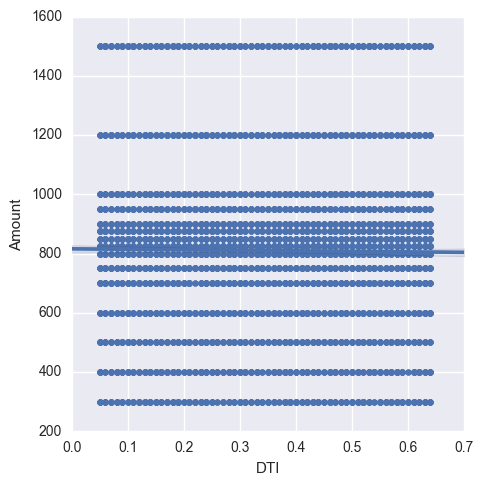

In [61]:
sns.lmplot(x='DTI', y='Amount',data=data)

### The DTI is not having any impact to the Loan Amount. So we can say that this two variables are not related. Similar is the chart for Loan Repayment.

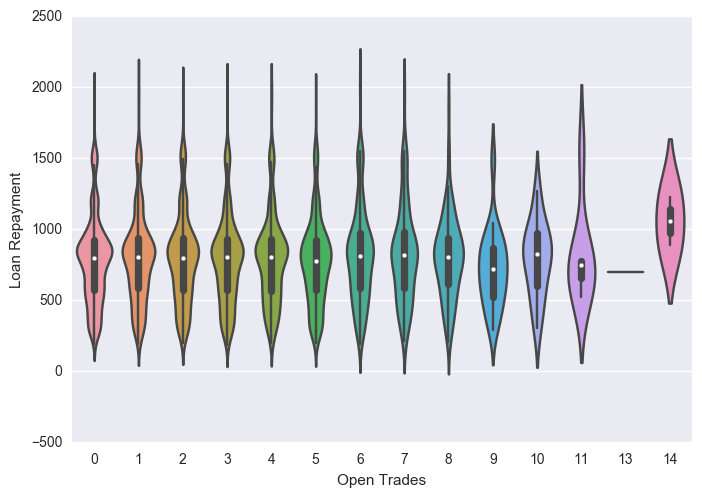

In [62]:
sns.violinplot(x=data['Open Trades'], y=data['Loan Repayment'])

### High Open Trades might have high possibility of Loan Repayment

### Append the hot encoded account level columns in previous part

In [63]:
data_other=pd.concat([data, data_fm], axis=1)
data_other=data_other.drop(data_other.filter(like='account'),axis=1)
data_other=data_other.drop(data_other.filter(like='date'),axis=1)
data_other=data_other.drop(data_other.filter(like='Date'),axis=1)
data_other['Home Ownership']=data_other['Home Ownership'].astype('category')
data_other['Home Ownership']=data_other['Home Ownership'].cat.codes
data_other['State']=data_other['State'].astype('category')
data_other['State']=data_other['State'].cat.codes
data_other=data_other.fillna(0)

In [64]:

data_other_copy=data_other.copy()
data_other_copy=data_other_copy.drop(['loan_percentage','loan_repayment_flag_by_scheduled_repayment','Loan Repayment'],axis=1)

In [65]:
corr_matrix=data_other_copy.corr()

In [66]:
to_drop_list=[]
for i in corr_matrix:
    for j in corr_matrix.index:
        
        if corr_matrix.loc[j][i]>0.95 and j!=i and (j not in to_drop_list and i not in to_drop_list):
            to_drop_list.append(j)
set(to_drop_list)
print(sorted(set(to_drop_list)))

['A14(*)_0', 'A16(*)_0', 'B12(*)_1', 'B12(*)_2', 'B14(*)_1', 'B14(*)_2', 'Credit Feature 10', 'Credit Feature 11', 'Credit Feature 12', 'Credit Feature 13', 'Credit Feature 15', 'Credit Feature 16', 'Credit Feature 19', 'Credit Feature 21', 'Credit Feature 22', 'Credit Feature 24', 'Credit Feature 6', 'Credit Feature 7', 'Scheduled Repayment', 'loan_repayment_salary']


In [67]:
data_metric=data_other_copy.drop(to_drop_list, axis=1)

In [68]:
data_metric.head()

State  Amount  FICO   DTI  Net Income  Home Ownership  Open Trades  \
0     10    1000   650  0.16        3200               1            0   
1      3     600   691  0.15        3500               0            0   
2      1    1500   550  0.44        1700               1            0   
3      5    1500   698  0.30        1500               1            0   
4      0     875   661  0.57        3400               1            3   

   Credit Feature 1  Credit Feature 2  Credit Feature 3  ...    B37(*)_2  \
0         -3.448601        -13.781655        -20.453486  ...           0   
1         -3.448601        -14.940162        -20.552343  ...           0   
2         -3.448601        -13.865113        -21.465582  ...           0   
3         -3.448601        -14.252900        -20.784594  ...           0   
4         -3.448601        -14.600056        -19.458587  ...           0   

   B25(*)_2  B15(*)_2  B17(*)_2  B16(*)_2  B30(*)_2  B21(*)_2  B02(#)_2  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   B10_2  B09_2  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  

[5 rows x 132 columns]

### Data Modelling

### Will use 'loan_repayment_percentage' as dependent variable. I already dropped the 'Loan Repayment' and other correlated variables

### Covereted the categorical variables into integer codes in previous step

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
labels = np.array(data_metric['loan_repayment_percentage'])
data_data=data_metric.copy()
data_data= data_data.drop(['loan_repayment_percentage','loan_repayment_flag_by_amount'], axis = 1)
X = data_data
Y = labels
reg = LinearRegression()
reg = reg.fit(X, Y)
Y_pred = reg.predict(X)
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)
print(rmse)
print(r2)

0.0647548441607
0.505745627088


### The Linear Regression works with Root mean square error of 5.5 and R2 as 63.9%

### Later I am using Random Forest for prediction

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features=30, max_depth=8, min_samples_leaf=50)
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features=25, max_depth=5)

In [71]:
train_data, test_data, train_target, test_target = train_test_split(data_data, labels, test_size = 0.25, random_state = 42)

In [72]:
rf.fit(train_data, train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=50,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [73]:
rf.score(test_data, test_target)

0.94381300181913352

### The random forest provides accuracy of 94%. Later we need to analyze the impact from errors.

C:\Users\anupgaurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


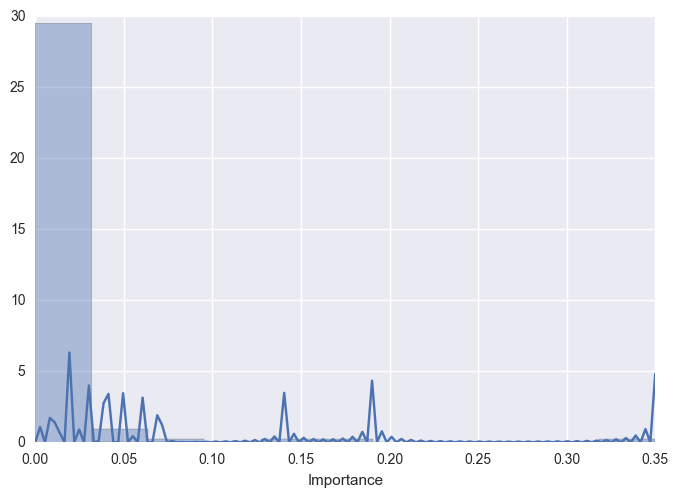

In [74]:
data_fi = pd.DataFrame(data=rf.feature_importances_,index=data_data.columns).reset_index()
data_fi.columns=['Column Name', 'Importance']
data_fi['Importance']=round(data_fi['Importance'],2)
sns.distplot(data_fi['Importance'])

### As seen in relationship charts above in exploratory analysis credit variables are most important variables for predicting loan repayment

I remove the credit variables and see the model performance

In [75]:
data_data_metric=data_data.copy()
data_data_metric=data_data_metric.drop(data_data_metric.filter(like='Credit'), axis=1)

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_other = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features=10, max_depth=8, min_samples_leaf=50)

train_data_other, test_data_other, train_target_other, test_target_other = train_test_split(data_data_metric, labels, test_size = 0.25, random_state = 42)
rf_other.fit(train_data_other, train_target_other)
rf_other.score(test_data_other, test_target_other)

-0.0013620597623855701

In [77]:
### The model does not show accuracy by removing credit variables

C:\Users\anupgaurav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


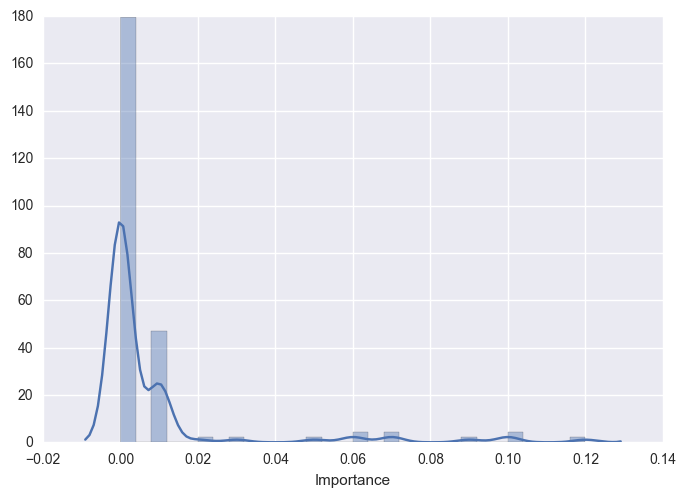

In [78]:
data_fi_other = pd.DataFrame(data=rf_other.feature_importances_,index=data_data_metric.columns).reset_index()
data_fi_other.columns=['Column Name', 'Importance']
data_fi_other['Importance']=round(data_fi_other['Importance'],2)
sns.distplot(data_fi_other['Importance'].sort_values())

In [79]:
data_fi_other.sort_values(by='Importance', ascending=          False)

Column Name  Importance
13         salary_percentage        0.12
2                       FICO        0.10
4                 Net Income        0.10
3                        DTI        0.09
1                     Amount        0.07
6                Open Trades        0.07
0                      State        0.06
8     days_since_delinquency        0.06
7    Total Amount Delinquent        0.05
9               FICO_bracket        0.03
5             Home Ownership        0.02
50                  B01(#)_1        0.01
32                     A07_0        0.01
71                  B22(*)_1        0.01
39                  A03(#)_0        0.01
43                     A09_0        0.01
48                     A06_0        0.01
62                     B06_1        0.01
84                  B01(#)_2        0.01
82                     B09_1        0.01
101                    B05_2        0.01
65                  B04(#)_1        0.01
67                     B05_1        0.01
31                     A05_0        0.01
35                  A01(#)_0        0.01
18                     B38_0        0.01
111                 B16(*)_2        0.01
10            delinquency_yr        0.01
11          delinquency_yr_2        0.01
12          delinquency_yr_5        0.01
115                    B10_2        0.01
16                     A08_0        0.01
72                     B08_1        0.01
100                 B04(#)_2        0.00
78                  B21(*)_1        0.00
108                 B25(*)_2        0.00
83                  B20(*)_2        0.00
114                 B02(#)_2        0.00
81                     B10_1        0.00
107                 B37(*)_2        0.00
80                  B02(#)_1        0.00
79                  B30(*)_1        0.00
102                    B11_2        0.00
99                  B34(*)_2        0.00
77                  B16(*)_1        0.00
76                  B17(*)_1        0.00
103                 B28(*)_2        0.00
75                  B15(*)_1        0.00
104                 B26(*)_2        0.00
74                  B25(*)_1        0.00
73                  B37(*)_1        0.00
85                  B24(*)_2        0.00
86                  B19(*)_2        0.00
87                  B03(#)_2        0.00
113                 B21(*)_2        0.00
110                 B17(*)_2        0.00
98                  B18(*)_2        0.00
97                     B06_2        0.00
96                  B23(*)_2        0.00
109                 B15(*)_2        0.00
95                  B31(*)_2        0.00
94                  B35(*)_2        0.00
93                  B27(*)_2        0.00
112                 B30(*)_2        0.00
92                  B13(*)_2        0.00
91                     B07_2        0.00
90                  B36(*)_2        0.00
89                  B33(*)_2        0.00
105                 B22(*)_2        0.00
88                  B32(*)_2        0.00
106                    B08_2        0.00
58                  B13(*)_1        0.00
70                  B26(*)_1        0.00
40                  A30(*)_0        0.00
37                  A35(*)_0        0.00
36                  A27(*)_0        0.00
34                  A13(*)_0        0.00
33                  A33(*)_0        0.00
30                  A32(*)_0        0.00
29                     A10_0        0.00
28                  A31(*)_0        0.00
27                  A36(*)_0        0.00
26                  A19(*)_0        0.00
25                  A17(*)_0        0.00
24                  A37(*)_0        0.00
23                  A21(*)_0        0.00
22                  A12(*)_0        0.00
21                  A25(*)_0        0.00
20                  A24(*)_0        0.00
19                  A29(*)_0        0.00
17                  A18(*)_0        0.00
15                  A22(*)_0        0.00
14                  A26(*)_0        0.00
38                  A04(#)_0        0.00
41                  A23(*)_0        0.00
69                  B28(*)_1        0.00
42                  A34(*)_0        0.00

In [80]:
test_predict=rf.predict(test_data)

In [81]:
test_predict[:5]

array([ 0.66633366,  0.66685648,  0.66787074,  0.66555222,  0.66729927])

In [82]:
test_target[:5]

array([ 0.7 ,  0.68,  0.64,  0.65,  0.71])

In [83]:
data_test=pd.DataFrame()
data_test['target']=test_target
data_test['predict']=test_predict
data_test['data_error']=test_target-test_predict

In [84]:
data_test

target   predict  data_error
0       0.70  0.666334    0.033666
1       0.68  0.666856    0.013144
2       0.64  0.667871   -0.027871
3       0.65  0.665552   -0.015552
4       0.71  0.667299    0.042701
5       0.68  0.666680    0.013320
6       0.47  0.487540   -0.017540
7       0.65  0.665587   -0.015587
8       0.65  0.665901   -0.015901
9       0.46  0.470493   -0.010493
10      0.64  0.668294   -0.028294
11      0.65  0.665572   -0.015572
12      0.67  0.665189    0.004811
13      0.63  0.664435   -0.034435
14      0.65  0.665931   -0.015931
15      0.69  0.666601    0.023399
16      0.47  0.487530   -0.017530
17      0.88  0.854348    0.025652
18      0.66  0.665415   -0.005415
19      0.69  0.667109    0.022891
20      0.89  0.845507    0.044493
21      0.65  0.666022   -0.016022
22      0.69  0.666683    0.023317
23      0.88  0.853694    0.026306
24      0.67  0.664233    0.005767
25      0.92  0.849466    0.070534
26      0.67  0.666287    0.003713
27      0.65  0.665763   -0.015763
28      0.67  0.664699    0.005301
29      0.66  0.665975   -0.005975
30      0.44  0.467833   -0.027833
31      0.65  0.665874   -0.015874
32      0.62  0.666095   -0.046095
33      0.67  0.667577    0.002423
34      0.67  0.666888    0.003112
35      0.68  0.666096    0.013904
36      0.64  0.666369   -0.026369
37      0.47  0.470306   -0.000306
38      0.65  0.666220   -0.016220
39      0.67  0.667006    0.002994
40      0.66  0.667004   -0.007004
41      0.50  0.469795    0.030205
42      0.68  0.666551    0.013449
43      0.44  0.471278   -0.031278
44      0.65  0.665912   -0.015912
45      0.51  0.474766    0.035234
46      0.66  0.664902   -0.004902
47      0.68  0.666217    0.013783
48      0.65  0.665337   -0.015337
49      0.65  0.665998   -0.015998
50      0.67  0.666989    0.003011
51      0.65  0.666562   -0.016562
52      0.68  0.669117    0.010883
53      0.65  0.664902   -0.014902
54      0.62  0.665705   -0.045705
55      0.66  0.664420   -0.004420
56      0.63  0.665968   -0.035968
57      0.90  0.855495    0.044505
58      0.66  0.665650   -0.005650
59      0.68  0.665038    0.014962
60      0.48  0.466896    0.013104
61      0.65  0.665966   -0.015966
62      0.64  0.666066   -0.026066
63      0.48  0.475636    0.004364
64      0.48  0.468188    0.011812
65      0.66  0.665879   -0.005879
66      0.68  0.666551    0.013449
67      0.86  0.855252    0.004748
68      0.67  0.665680    0.004320
69      0.65  0.665085   -0.015085
70      0.65  0.666243   -0.016243
71      0.47  0.467813    0.002187
72      0.65  0.666645   -0.016645
73      0.68  0.667545    0.012455
74      0.66  0.666793   -0.006793
75      0.65  0.667335   -0.017335
76      0.46  0.470894   -0.010894
77      0.69  0.665242    0.024758
78      0.68  0.666604    0.013396
79      0.67  0.667298    0.002702
80      0.68  0.667346    0.012654
81      0.51  0.469961    0.040039
82      0.67  0.666275    0.003725
83      0.68  0.664881    0.015119
84      0.70  0.667274    0.032726
85      0.66  0.666037   -0.006037
86      0.69  0.665252    0.024748
87      0.64  0.665714   -0.025714
88      0.65  0.666789   -0.016789
89      0.67  0.665945    0.004055
90      0.68  0.665801    0.014199
91      0.66  0.666534   -0.006534
92      0.65  0.665453   -0.015453
93      0.50  0.474558    0.025442
94      0.66  0.665839   -0.005839
95      0.67  0.664267    0.005733
96      0.65  0.665773   -0.015773
97      0.63  0.667079   -0.037079
98      0.69  0.667141    0.022859
99      0.65  0.666540   -0.016540
100     0.46  0.571680   -0.111680
101     0.66  0.665722   -0.005722
102     0.70  0.665871    0.034129
103     0.68  0.666322    0.013678
104     0.68  0.666560    0.013440
105     0.70  0.665965    0.034035
106     0.64  0.666113   -0.026113
107     0.65  0.666285   -0.016285
108     0.69  0.666363    0.023637
109     0.65  0.663598   -0.013598
110     0.66  0.665231   -0.005231
111     0.68  0.666488    0.013512
112     0.62  0.666341   -0.046341
113     0.48  0.

## Some comments about data we need for better results

### Variables that would be more beneficial

### 1. What was final result about the loan.
        
        The data shared for exercise tells the amount repayed by the borrower. But it is not mentioned if it closed or still the borrower is paying. This should be the ideal target variable for analysis.
        
### 2. The time/tenure the loan was sanctioned for.

### 3. Loan Purpose

### 4. Borrower Profession

### 5. Demographic details about borrower

### 6. Credit details about the borrower
        
        Number of credit lines currently avialable or used by borrowers. Also utilization of the credit lines available.